# Import Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Heartbeat Annotation

In [2]:
N = ['N', 'L', 'R', 'e', 'j']
SVEB = ['A', 'a', 'J', 'S']
VEB = ['V', 'E']
F = ['F']
Q = ['l', 'f', 'Q']
Non_beat_anns = ['[', ']', '!', 'x', '(', ')', 'p', 't', 'u', '`', '~', '^', '|', '+', 's', 'T', '*', 'D', '=', '"', '@']

# Load Training Data from Files

In [3]:
DS1 = ['101', '106', '108', '109', '112', '114', '115', '116', '118', '119', '122', '124', 
       '201', '203', '205', '207', '208', '209', '215', '220', '223', '230']

In [4]:
Training_Hbs_lead0 = {}
Training_Hbs_lead1 = {}

for ds in DS1:
    Training_Hbs_lead0[ds] = pd.read_csv('Extracted Features/DS1/' + ds + '_lead0.csv')
    Training_Hbs_lead1[ds] = pd.read_csv('Extracted Features/DS1/' + ds + '_lead1.csv')
    
    new_beat_0 = []
    new_beat_1 = []
    
    cA7_lead0 = []
    cD7_lead0 = []
    cD6_lead0 = []
    cD5_lead0 = []
    cD4_lead0 = []
    cD3_lead0 = []
    cD2_lead0 = []
    cD1_lead0 = []
    
    cA7_lead1 = []
    cD7_lead1 = []
    cD6_lead1 = []
    cD5_lead1 = []
    cD4_lead1 = []
    cD3_lead1 = []
    cD2_lead1 = []
    cD1_lead1 = []
    
    for i in range(len(Training_Hbs_lead0[ds]['beat'])):
        new_beat_0.append(pd.Series(json.loads(Training_Hbs_lead0[ds]['beatValues'][i]), index=json.loads(Training_Hbs_lead0[ds]['beatIndex'][i])))
        new_beat_1.append(pd.Series(json.loads(Training_Hbs_lead1[ds]['beatValues'][i]), index=json.loads(Training_Hbs_lead1[ds]['beatIndex'][i])))
        
        cA7_lead0.append(json.loads(Training_Hbs_lead0[ds]['cA7'][i]))
        cD7_lead0.append(json.loads(Training_Hbs_lead0[ds]['cD7'][i]))
        cD6_lead0.append(json.loads(Training_Hbs_lead0[ds]['cD6'][i]))
        cD5_lead0.append(json.loads(Training_Hbs_lead0[ds]['cD5'][i]))
        cD4_lead0.append(json.loads(Training_Hbs_lead0[ds]['cD4'][i]))
        cD3_lead0.append(json.loads(Training_Hbs_lead0[ds]['cD3'][i]))
        cD2_lead0.append(json.loads(Training_Hbs_lead0[ds]['cD2'][i]))
        cD1_lead0.append(json.loads(Training_Hbs_lead0[ds]['cD1'][i]))
        
        cA7_lead1.append(json.loads(Training_Hbs_lead1[ds]['cA7'][i]))
        cD7_lead1.append(json.loads(Training_Hbs_lead1[ds]['cD7'][i]))
        cD6_lead1.append(json.loads(Training_Hbs_lead1[ds]['cD6'][i]))
        cD5_lead1.append(json.loads(Training_Hbs_lead1[ds]['cD5'][i]))
        cD4_lead1.append(json.loads(Training_Hbs_lead1[ds]['cD4'][i]))
        cD3_lead1.append(json.loads(Training_Hbs_lead1[ds]['cD3'][i]))
        cD2_lead1.append(json.loads(Training_Hbs_lead1[ds]['cD2'][i]))
        cD1_lead1.append(json.loads(Training_Hbs_lead1[ds]['cD1'][i]))
        
    Training_Hbs_lead0[ds]['beat'] = new_beat_0
    Training_Hbs_lead0[ds]['cA7'] = cA7_lead0
    Training_Hbs_lead0[ds]['cD7'] = cD7_lead0                      
    Training_Hbs_lead0[ds]['cD6'] = cD6_lead0
    Training_Hbs_lead0[ds]['cD5'] = cD5_lead0                      
    Training_Hbs_lead0[ds]['cD4'] = cD4_lead0 
    Training_Hbs_lead0[ds]['cD3'] = cD3_lead0                      
    Training_Hbs_lead0[ds]['cD2'] = cD2_lead0 
    Training_Hbs_lead0[ds]['cD1'] = cD1_lead0                      
                          
    Training_Hbs_lead1[ds]['beat'] = new_beat_1
    Training_Hbs_lead1[ds]['cA7'] = cA7_lead1
    Training_Hbs_lead1[ds]['cD7'] = cD7_lead1                      
    Training_Hbs_lead1[ds]['cD6'] = cD6_lead1
    Training_Hbs_lead1[ds]['cD5'] = cD5_lead1                      
    Training_Hbs_lead1[ds]['cD4'] = cD4_lead1 
    Training_Hbs_lead1[ds]['cD3'] = cD3_lead1                      
    Training_Hbs_lead1[ds]['cD2'] = cD2_lead1 
    Training_Hbs_lead1[ds]['cD1'] = cD1_lead1  

In [5]:
Training_Hbs_lead0['108'].head(1)

,ann,annIdx,beat,cA7,cD1,cD2,cD3,cD4,cD5,cD6,cD7,kurtosis,postRR,preRR,skewness,beatValues,beatIndex
0,N,441,351 0.120418 352 0.131024 353 0.14175...,"[-0.6855614132675378, 0.6510380366797159]","[-0.007499561745074906, -0.0081047163052224, -...","[-0.021762909161338634, -0.02551553356263281, ...","[-0.06775185534555714, -0.06327188790700006, 0...","[-0.1909314964659382, 0.36584125262880723, -0....","[0.3009534213591719, 0.014668449869526007, 1.1...","[0.7790524149689939, -0.8858083129886856, -0.3...","[1.3384287988998684, 0.2783035336978315]",3.738128,347.0,NaN,-1.764917,"[0.12041775474730385, 0.13102373667904321, 0.1...","[351, 352, 353, 354, 355, 356, 357, 358, 359, ..."


# Load Testing Data from Files

In [6]:
DS2 = ['100', '103', '105', '111', '113', '117', '121', '123', '200', '202', '210', '212', 
       '213', '214', '219', '221', '222', '228', '231', '232', '233', '234']

In [7]:
Testing_Hbs_lead0 = {}
Testing_Hbs_lead1 = {}

for ds in DS2:
    Testing_Hbs_lead0[ds] = pd.read_csv('Extracted Features/DS2/' + ds + '_lead0.csv')
    Testing_Hbs_lead1[ds] = pd.read_csv('Extracted Features/DS2/' + ds + '_lead1.csv')
    
    new_beat_0 = []
    new_beat_1 = []
    
    cA7_lead0 = []
    cD7_lead0 = []
    cD6_lead0 = []
    cD5_lead0 = []
    cD4_lead0 = []
    cD3_lead0 = []
    cD2_lead0 = []
    cD1_lead0 = []
    
    cA7_lead1 = []
    cD7_lead1 = []
    cD6_lead1 = []
    cD5_lead1 = []
    cD4_lead1 = []
    cD3_lead1 = []
    cD2_lead1 = []
    cD1_lead1 = []
    
    for i in range(len(Testing_Hbs_lead0[ds]['beat'])):
        new_beat_0.append(pd.Series(json.loads(Testing_Hbs_lead0[ds]['beatValues'][i]), index=json.loads(Testing_Hbs_lead0[ds]['beatIndex'][i])))
        new_beat_1.append(pd.Series(json.loads(Testing_Hbs_lead1[ds]['beatValues'][i]), index=json.loads(Testing_Hbs_lead1[ds]['beatIndex'][i])))
        
        cA7_lead0.append(json.loads(Testing_Hbs_lead0[ds]['cA7'][i]))
        cD7_lead0.append(json.loads(Testing_Hbs_lead0[ds]['cD7'][i]))
        cD6_lead0.append(json.loads(Testing_Hbs_lead0[ds]['cD6'][i]))
        cD5_lead0.append(json.loads(Testing_Hbs_lead0[ds]['cD5'][i]))
        cD4_lead0.append(json.loads(Testing_Hbs_lead0[ds]['cD4'][i]))
        cD3_lead0.append(json.loads(Testing_Hbs_lead0[ds]['cD3'][i]))
        cD2_lead0.append(json.loads(Testing_Hbs_lead0[ds]['cD2'][i]))
        cD1_lead0.append(json.loads(Testing_Hbs_lead0[ds]['cD1'][i]))
        
        cA7_lead1.append(json.loads(Testing_Hbs_lead1[ds]['cA7'][i]))
        cD7_lead1.append(json.loads(Testing_Hbs_lead1[ds]['cD7'][i]))
        cD6_lead1.append(json.loads(Testing_Hbs_lead1[ds]['cD6'][i]))
        cD5_lead1.append(json.loads(Testing_Hbs_lead1[ds]['cD5'][i]))
        cD4_lead1.append(json.loads(Testing_Hbs_lead1[ds]['cD4'][i]))
        cD3_lead1.append(json.loads(Testing_Hbs_lead1[ds]['cD3'][i]))
        cD2_lead1.append(json.loads(Testing_Hbs_lead1[ds]['cD2'][i]))
        cD1_lead1.append(json.loads(Testing_Hbs_lead1[ds]['cD1'][i]))
        
    Testing_Hbs_lead0[ds]['beat'] = new_beat_0
    Testing_Hbs_lead0[ds]['cA7'] = cA7_lead0
    Testing_Hbs_lead0[ds]['cD7'] = cD7_lead0                      
    Testing_Hbs_lead0[ds]['cD6'] = cD6_lead0
    Testing_Hbs_lead0[ds]['cD5'] = cD5_lead0                      
    Testing_Hbs_lead0[ds]['cD4'] = cD4_lead0 
    Testing_Hbs_lead0[ds]['cD3'] = cD3_lead0                      
    Testing_Hbs_lead0[ds]['cD2'] = cD2_lead0 
    Testing_Hbs_lead0[ds]['cD1'] = cD1_lead0                      
                          
    Testing_Hbs_lead1[ds]['beat'] = new_beat_1
    Testing_Hbs_lead1[ds]['cA7'] = cA7_lead1
    Testing_Hbs_lead1[ds]['cD7'] = cD7_lead1                      
    Testing_Hbs_lead1[ds]['cD6'] = cD6_lead1
    Testing_Hbs_lead1[ds]['cD5'] = cD5_lead1                      
    Testing_Hbs_lead1[ds]['cD4'] = cD4_lead1 
    Testing_Hbs_lead1[ds]['cD3'] = cD3_lead1                      
    Testing_Hbs_lead1[ds]['cD2'] = cD2_lead1 
    Testing_Hbs_lead1[ds]['cD1'] = cD1_lead1  

In [8]:
Testing_Hbs_lead0['105'].head(1)

,ann,annIdx,beat,cA7,cD1,cD2,cD3,cD4,cD5,cD6,cD7,kurtosis,postRR,preRR,skewness,beatValues,beatIndex
0,N,196,106 -0.004937 107 -0.004219 108 -0.00333...,"[1.5844777501600635, -0.36985029277674747]","[-0.0005074752601473076, -0.000682562347570346...","[-0.001728801591072192, -0.0002090682989102632...","[-0.0031979442446018165, -0.013979095860740283...","[-0.011043111774410757, -0.16880017877670617, ...","[-0.3068244520617898, 0.5176590206737243, -2.9...","[0.08947136053677307, 1.8822124772535171, -0.8...","[-1.0953481028411476, -0.7149465074712467]",7.034972,262.0,NaN,2.601941,"[-0.0049367932597447822, -0.004219114864275645...","[106, 107, 108, 109, 110, 111, 112, 113, 114, ..."


# Load SUP Data from Files

In [1156]:
#SUP = ['800', '801', '802', '803', '804', '805', '806', '807', '808', '809', '810', '811', '812', '820', '821', 
#       '822', '823', '824', '825', '826', '827', '828', '829', '840', '841', '842', '843', '844', '845', '846', 
#       '847', '848', '849', '850']

In [1173]:
SUP = ['851','852','853','854','855','856','857','858','859','860','861','862','863','864','865','866','867',
       '868','869','870','871','872','873','874','875','876','877','878','879','880','881','882','883','884',
       '885','886','887','888','889','890','891','892','893','894']

In [1174]:
SUP_Hbs_lead0 = {}

for ds in SUP:
    print(ds)
    SUP_Hbs_lead0[ds] = pd.read_csv('D:/Data/Extracted Features/SUP/' + ds + '_lead0.csv')
    
    new_beat_0 = []
    
    cA7_lead0 = []
    cD7_lead0 = []
    cD6_lead0 = []
    cD5_lead0 = []
    cD4_lead0 = []
    cD3_lead0 = []
    cD2_lead0 = []
    cD1_lead0 = []
    
    for i in range(len(SUP_Hbs_lead0[ds]['beat'])):
        new_beat_0.append(pd.Series(json.loads(SUP_Hbs_lead0[ds]['beatValues'][i]), index=json.loads(SUP_Hbs_lead0[ds]['beatIndex'][i])))
        
        cA7_lead0.append(json.loads(SUP_Hbs_lead0[ds]['cA7'][i]))
        cD7_lead0.append(json.loads(SUP_Hbs_lead0[ds]['cD7'][i]))
        cD6_lead0.append(json.loads(SUP_Hbs_lead0[ds]['cD6'][i]))
        cD5_lead0.append(json.loads(SUP_Hbs_lead0[ds]['cD5'][i]))
        cD4_lead0.append(json.loads(SUP_Hbs_lead0[ds]['cD4'][i]))
        cD3_lead0.append(json.loads(SUP_Hbs_lead0[ds]['cD3'][i]))
        cD2_lead0.append(json.loads(SUP_Hbs_lead0[ds]['cD2'][i]))
        cD1_lead0.append(json.loads(SUP_Hbs_lead0[ds]['cD1'][i]))
        
    SUP_Hbs_lead0[ds]['beat'] = new_beat_0
    SUP_Hbs_lead0[ds]['cA7'] = cA7_lead0
    SUP_Hbs_lead0[ds]['cD7'] = cD7_lead0                      
    SUP_Hbs_lead0[ds]['cD6'] = cD6_lead0
    SUP_Hbs_lead0[ds]['cD5'] = cD5_lead0                      
    SUP_Hbs_lead0[ds]['cD4'] = cD4_lead0 
    SUP_Hbs_lead0[ds]['cD3'] = cD3_lead0                      
    SUP_Hbs_lead0[ds]['cD2'] = cD2_lead0 
    SUP_Hbs_lead0[ds]['cD1'] = cD1_lead0                      

851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894


In [983]:
SUP_Hbs_lead0['851'].head(1)

,ann,annIdx,beat,cA7,cD1,cD2,cD3,cD4,cD5,cD6,cD7,kurtosis,postRR,preRR,skewness,beatValues,beatIndex
0,N,236,146 0.004401 147 0.004539 148 0.00606...,"[2.0728159249247087, 0.06249117793281288]","[-9.707552380883644e-05, -0.001295537934714896...","[-0.0025063216758385264, 0.0037813090096038907...","[-0.0005321909783577231, 0.023911382933700782,...","[0.03830452387900508, 0.012260985926018264, -0...","[0.1604972652796808, -1.0450939691010928, 0.14...","[-0.8675467657409904, -1.6442954175267506, -2....","[-1.2083775492531927, -0.029406338635164782]",7.114818,187.0,NaN,2.166995,"[0.0044012795578855027, 0.0045385650802304313,...","[146, 147, 148, 149, 150, 151, 152, 153, 154, ..."


# Load INCART Data from Files

In [1685]:
INCART = []
for i in range(60, 76):
    if i < 10:
        INCART.append('I0' + str(i))
    else:
        INCART.append('I' + str(i))
print(INCART)

['I60', 'I61', 'I62', 'I63', 'I64', 'I65', 'I66', 'I67', 'I68', 'I69', 'I70', 'I71', 'I72', 'I73', 'I74', 'I75']


In [1686]:
INCART_Hbs_lead0 = {}
INCART_Hbs_lead1 = {}

for ds in INCART:
    print(ds)
    INCART_Hbs_lead0[ds] = pd.read_csv('D:/Data/Extracted Features/INCART/' + ds + '_lead0.csv')
    INCART_Hbs_lead1[ds] = pd.read_csv('D:/Data/Extracted Features/INCART/' + ds + '_lead1.csv')
    
    new_beat_0 = []
    new_beat_1 = []
    
    cA7_lead0 = []
    cD7_lead0 = []
    cD6_lead0 = []
    cD5_lead0 = []
    cD4_lead0 = []
    cD3_lead0 = []
    cD2_lead0 = []
    cD1_lead0 = []
    
    cA7_lead1 = []
    cD7_lead1 = []
    cD6_lead1 = []
    cD5_lead1 = []
    cD4_lead1 = []
    cD3_lead1 = []
    cD2_lead1 = []
    cD1_lead1 = []
    
    for i in range(len(INCART_Hbs_lead0[ds]['beat'])):
        new_beat_0.append(pd.Series(json.loads(INCART_Hbs_lead0[ds]['beatValues'][i]), index=json.loads(INCART_Hbs_lead0[ds]['beatIndex'][i])))
        new_beat_1.append(pd.Series(json.loads(INCART_Hbs_lead1[ds]['beatValues'][i]), index=json.loads(INCART_Hbs_lead1[ds]['beatIndex'][i])))
        
        cA7_lead0.append(json.loads(INCART_Hbs_lead0[ds]['cA7'][i]))
        cD7_lead0.append(json.loads(INCART_Hbs_lead0[ds]['cD7'][i]))
        cD6_lead0.append(json.loads(INCART_Hbs_lead0[ds]['cD6'][i]))
        cD5_lead0.append(json.loads(INCART_Hbs_lead0[ds]['cD5'][i]))
        cD4_lead0.append(json.loads(INCART_Hbs_lead0[ds]['cD4'][i]))
        cD3_lead0.append(json.loads(INCART_Hbs_lead0[ds]['cD3'][i]))
        cD2_lead0.append(json.loads(INCART_Hbs_lead0[ds]['cD2'][i]))
        cD1_lead0.append(json.loads(INCART_Hbs_lead0[ds]['cD1'][i]))
        
        cA7_lead1.append(json.loads(INCART_Hbs_lead1[ds]['cA7'][i]))
        cD7_lead1.append(json.loads(INCART_Hbs_lead1[ds]['cD7'][i]))
        cD6_lead1.append(json.loads(INCART_Hbs_lead1[ds]['cD6'][i]))
        cD5_lead1.append(json.loads(INCART_Hbs_lead1[ds]['cD5'][i]))
        cD4_lead1.append(json.loads(INCART_Hbs_lead1[ds]['cD4'][i]))
        cD3_lead1.append(json.loads(INCART_Hbs_lead1[ds]['cD3'][i]))
        cD2_lead1.append(json.loads(INCART_Hbs_lead1[ds]['cD2'][i]))
        cD1_lead1.append(json.loads(INCART_Hbs_lead1[ds]['cD1'][i]))
        
    INCART_Hbs_lead0[ds]['beat'] = new_beat_0
    INCART_Hbs_lead0[ds]['cA7'] = cA7_lead0
    INCART_Hbs_lead0[ds]['cD7'] = cD7_lead0                      
    INCART_Hbs_lead0[ds]['cD6'] = cD6_lead0
    INCART_Hbs_lead0[ds]['cD5'] = cD5_lead0                      
    INCART_Hbs_lead0[ds]['cD4'] = cD4_lead0 
    INCART_Hbs_lead0[ds]['cD3'] = cD3_lead0                      
    INCART_Hbs_lead0[ds]['cD2'] = cD2_lead0 
    INCART_Hbs_lead0[ds]['cD1'] = cD1_lead0                      
                          
    INCART_Hbs_lead1[ds]['beat'] = new_beat_1
    INCART_Hbs_lead1[ds]['cA7'] = cA7_lead1
    INCART_Hbs_lead1[ds]['cD7'] = cD7_lead1                      
    INCART_Hbs_lead1[ds]['cD6'] = cD6_lead1
    INCART_Hbs_lead1[ds]['cD5'] = cD5_lead1                      
    INCART_Hbs_lead1[ds]['cD4'] = cD4_lead1 
    INCART_Hbs_lead1[ds]['cD3'] = cD3_lead1                      
    INCART_Hbs_lead1[ds]['cD2'] = cD2_lead1 
    INCART_Hbs_lead1[ds]['cD1'] = cD1_lead1  

I60
I61
I62
I63
I64
I65
I66
I67
I68
I69
I70
I71
I72
I73
I74
I75


In [906]:
INCART_Hbs_lead0['I01'].head(1)

,ann,annIdx,beat,cA7,cD1,cD2,cD3,cD4,cD5,cD6,cD7,kurtosis,postRR,preRR,skewness,beatValues,beatIndex
0,N,157,67 -0.072184 68 -0.079161 69 -0.08707...,"[0.5242842638471439, 0.39201903248058456]","[0.004933053907834231, 0.0027809410044728616, ...","[0.013367952995756507, -0.010476911852706466, ...","[0.002564730814633112, -0.02657074178364137, -...","[-0.07657610368421508, -0.028273341154906588, ...","[-0.10534499737213335, -0.21334357645573487, -...","[-0.45552402609522685, 0.011789243545128392, -...","[-0.3948120914902048, 0.3728664160403449]",5.983733,227.0,NaN,2.110229,"[-0.072184296659828381, -0.07916068840020514, ...","[67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 7..."


# Experiments

### 1. 把所有feature放在一起做简单的测试

### 2. Feature Tree with Consideration of Beats Connections

# Preparing Training Data

### ------------------------------------------------------------------ 1 -------------------------------------------------------------------------------------

Feature Extraction, selection and Normalization

In [9]:
columns = ['ann', 'annIdx', 'beat', 'cA7', 'cD1', 'cD2', 'cD3', 'cD4', 'cD5', 'cD6', 'cD7', 
           'kurtosis', 'postRR', 'preRR', 'skewness', 'beatValues', 'beatIndex']
selected_colums = ['postRR', 'preRR', 'skewness', 'kurtosis', 'cD7', 'cD6', 'cD5', 'cD4']
Training_Data_Label_1 = []
Training_Data_1 = []

for ds in DS1:
    for i in range(len(Training_Hbs_lead0[ds]['beat'])):
        if np.isnan(Training_Hbs_lead0[ds]['postRR'][i]) or np.isnan(Training_Hbs_lead0[ds]['preRR'][i]):
            continue
            
        if Training_Hbs_lead0[ds]['ann'][i] in Non_beat_anns:
            continue
        elif Training_Hbs_lead0[ds]['ann'][i] in N:
            Training_Data_Label_1.append('N')
        elif Training_Hbs_lead0[ds]['ann'][i] in SVEB:
            Training_Data_Label_1.append('S')
        elif Training_Hbs_lead0[ds]['ann'][i] in VEB:
            Training_Data_Label_1.append('V')
        elif Training_Hbs_lead0[ds]['ann'][i] in F:
            Training_Data_Label_1.append('F')
        elif Training_Hbs_lead0[ds]['ann'][i] in Q:
            Training_Data_Label_1.append('Q')
        else:
            continue
            
        features = []
        for column in selected_colums:
            if type(Training_Hbs_lead0[ds][column][i]) == list:
                features.extend(Training_Hbs_lead0[ds][column][i])
            else:
                features.append(Training_Hbs_lead0[ds][column][i])
        Training_Data_1.append(features)

Training_Data_1 = preprocessing.scale(Training_Data_1)

测试DataSet的情况

In [10]:
print('Training_Data_1 Amount: ' + str(len(Training_Data_1)))
print('Training_Data_Label_1 Amount: ' + str(len(Training_Data_Label_1)))

Training_Data_1 Amount: 50959
Training_Data_Label_1 Amount: 50959


### ------------------------------------------------------------------ 2 -------------------------------------------------------------------------------------

Feature Selection

In [500]:
columns = ['ann', 'annIdx', 'beat', 'cA7', 'cD1', 'cD2', 'cD3', 'cD4', 'cD5', 'cD6', 'cD7', 
           'kurtosis', 'postRR', 'preRR', 'skewness', 'beatValues', 'beatIndex']
selected_colums = ['postRR', 'preRR', 'skewness', 'kurtosis', 'cD7', 'cD6', 'cD5', 'cD4']
Training_Data_Label_DS_2 = {}
Training_Data_DS_2 = {}
Training_Data_Label_2 = []
Training_Data_2 = []

for ds in DS1: 
    Training_Data_Label_DS_2[ds] = []
    Training_Data_DS_2[ds] = []
    dsLength = len(Training_Hbs_lead0[ds]['beat'])
    for i in range(1, dsLength-1):
        if Training_Hbs_lead0[ds]['ann'][i] in Non_beat_anns:
            continue
        elif Training_Hbs_lead0[ds]['ann'][i] in N:
            Training_Data_Label_2.append('N')
            Training_Data_Label_DS_2[ds].append('N')
        elif Training_Hbs_lead0[ds]['ann'][i] in SVEB:
            Training_Data_Label_2.append('S')
            Training_Data_Label_DS_2[ds].append('S')
        elif Training_Hbs_lead0[ds]['ann'][i] in VEB:
            Training_Data_Label_2.append('V')
            Training_Data_Label_DS_2[ds].append('V')
        elif Training_Hbs_lead0[ds]['ann'][i] in F:
            Training_Data_Label_2.append('F')
            Training_Data_Label_DS_2[ds].append('F')
        elif Training_Hbs_lead0[ds]['ann'][i] in Q:
            Training_Data_Label_2.append('Q')
            Training_Data_Label_DS_2[ds].append('Q')
        else:
            continue
        
        # 逐个计算feature
        features = []
        if ds == '114':
            for column in selected_colums:
                if type(Training_Hbs_lead1[ds][column][i]) == list:
                    features.extend(Training_Hbs_lead1[ds][column][i])
                else:
                    features.append(Training_Hbs_lead1[ds][column][i])
        else:
            for column in selected_colums:
                if type(Training_Hbs_lead0[ds][column][i]) == list:
                    features.extend(Training_Hbs_lead0[ds][column][i])
                else:
                    features.append(Training_Hbs_lead0[ds][column][i])
        Training_Data_2.append(features)
        Training_Data_DS_2[ds].append(features)
Training_Data_2 = preprocessing.scale(Training_Data_2)

Check Distribution over Selected Features

In [506]:
mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
selected_colums = ['postRR', 'preRR', 'skewness', 'kurtosis', 'cD7', 'cD6', 'cD5', 'cD4']
plt.figure(figsize=(15, 12), dpi=200)
p1 = plt.subplot(221)
p1.set_title('Recording 106')
p1.set_ylabel('kurtosis')
p1.set_xlabel('skewness')
p2 = plt.subplot(222)
p2.set_title('Recording 109')
p2.set_ylabel('kurtosis')
p2.set_xlabel('kurskewnesstosis')
p3 = plt.subplot(223)
p3.set_title('Recording 114')
p3.set_ylabel('kurtosis')
p3.set_xlabel('skewness')
p4 = plt.subplot(224)
p4.set_title('Recording 119')
p4.set_ylabel('kurtosis')
p4.set_xlabel('skewness')

for ds in ['106','109', '114', '119']:
    for i, features in enumerate(Training_Data_DS_2[ds]):
        if features[1] > 1000 or features[0] > 1000:
            continue
        if Training_Data_Label_DS_2[ds][i] in N:
            color = mark[0]
        elif Training_Data_Label_DS_2[ds][i] in VEB:
            color = mark[3]
        else:
            continue
        if ds == '106':
            p1.plot(features[2], features[3], color)
        elif ds == '109':
            p2.plot(features[2], features[3], color)
        elif ds == '114':
            p3.plot(features[2], features[3], color)
        elif ds == '119':
            p4.plot(features[2], features[3], color)
        else: 
            continue
plt.savefig('skewness&kurtosis')

从以上观察可得preRR是分辨N和S的最主要手段，其次，skewness和kurtosis有时也能分辨出，如201

Check Statistics

In [979]:
for ds in DS1:
    NNN = {'preRR': [], 'skewness': [], 'kurtosis': []}
    SSS = {'preRR': [], 'skewness': [], 'kurtosis': []}
    ALL = {'preRR': [], 'skewness': [], 'kurtosis': []}
    for idx, label in enumerate(Training_Data_Label_DS_2[ds]):
        if Training_Data_DS_2[ds][idx][1] > 1000:
            continue
        ALL['preRR'].append(Training_Data_DS_2[ds][idx][1])
        ALL['skewness'].append(Training_Data_DS_2[ds][idx][2])
        ALL['kurtosis'].append(Training_Data_DS_2[ds][idx][3])
        if label == 'N':
            NNN['preRR'].append(Training_Data_DS_2[ds][idx][1])
            NNN['skewness'].append(Training_Data_DS_2[ds][idx][2])
            NNN['kurtosis'].append(Training_Data_DS_2[ds][idx][3])
        if label == 'S':
            SSS['preRR'].append(Training_Data_DS_2[ds][idx][1])
            SSS['skewness'].append(Training_Data_DS_2[ds][idx][2])
            SSS['kurtosis'].append(Training_Data_DS_2[ds][idx][3])
    #print(ds + ': {' + str(np.mean(NNN['preRR'])) + ',' + str(np.mean(SSS['preRR'])) + '}') 
    ssmean = np.mean(SSS['preRR'])
    nnmean = np.mean(NNN['preRR'])
    #print(ds + ': ' + str((ssmean - nnmean) / nnmean))
    print(ds + ' N Median   ' + ': {' + str(np.median(NNN['preRR'])) + ',' + str(np.std(NNN['preRR'])) + '}') 
    print(ds + ' N Mean     ' + ': {' + str(np.mean(NNN['preRR'])) + ',' + str(np.std(NNN['preRR'])) + '}') 
    print(ds + ' S Median   ' + ': {' + str(np.median(SSS['preRR'])) + ',' + str(np.std(SSS['preRR'])) + '}')
    print(ds + ' S Mean     ' + ': {' + str(np.mean(SSS['preRR'])) + ',' + str(np.std(SSS['preRR'])) + '}')
    print(ds + ' ALL Median ' + ': {' + str(np.median(ALL['preRR'])) + ',' + str(np.std(ALL['preRR'])) + '}')
    print(ds + ' ALL Mean   ' + ': {' + str(np.mean(ALL['preRR'])) + ',' + str(np.std(ALL['preRR'])) + '}')
    print()

101 N Median   : {352.0,25.1790821543}
101 N Mean     : {348.66720517,25.1790821543}
101 S Median   : {237.0,58.105268455}
101 S Mean     : {254.666666667,58.105268455}
101 ALL Median : {352.0,25.5478841401}
101 ALL Mean   : {348.537056928,25.5478841401}

106 N Median   : {359.0,57.087551719}
106 N Mean     : {367.383388704,57.087551719}
106 S Median   : {nan,nan}
106 S Mean     : {nan,nan}
106 ALL Median : {337.0,93.9276053698}


D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


106 ALL Mean   : {320.488395062,93.9276053698}

108 N Median   : {371.0,40.4529350334}
108 N Mean     : {370.727691422,40.4529350334}
108 S Median   : {217.5,10.7790305687}
108 S Mean     : {218.25,10.7790305687}
108 ALL Median : {370.0,44.6740023936}
108 ALL Mean   : {368.766477273,44.6740023936}

109 N Median   : {257.0,12.6459931258}
109 N Mean     : {257.341502611,12.6459931258}
109 S Median   : {nan,nan}
109 S Mean     : {nan,nan}
109 ALL Median : {257.0,13.6176960228}
109 ALL Mean   : {256.72874654,13.6176960228}

112 N Median   : {256.0,7.70050813262}
112 N Mean     : {256.045777427,7.70050813262}
112 S Median   : {208.5,17.5}
112 S Mean     : {208.5,17.5}
112 ALL Median : {256.0,7.82777012034}
112 ALL Mean   : {256.008280757,7.82777012034}

114 N Median   : {341.0,44.5940676053}
114 N Mean     : {348.798129813,44.5940676053}
114 S Median   : {258.5,64.3317681157}
114 S Mean     : {257.916666667,64.3317681157}
114 ALL Median : {340.0,48.2318646304}
114 ALL Mean   : {345.87799680

# Preparing Testing Data

### ------------------------------------------------------------------ 1 -------------------------------------------------------------------------------------

Feature Extraction, selection and Normalization

In [11]:
columns = ['ann', 'annIdx', 'beat', 'cA7', 'cD1', 'cD2', 'cD3', 'cD4', 'cD5', 'cD6', 'cD7', 
           'kurtosis', 'postRR', 'preRR', 'skewness', 'beatValues', 'beatIndex']
selected_colums = ['postRR', 'preRR', 'skewness', 'kurtosis', 'cD7', 'cD6', 'cD5', 'cD4']
Testing_Data_Label_1 = []
Testing_Data_1 = []

for ds in DS2:
    for i in range(len(Testing_Hbs_lead0[ds]['beat'])):
        if np.isnan(Testing_Hbs_lead0[ds]['postRR'][i]) or np.isnan(Testing_Hbs_lead0[ds]['preRR'][i]):
            continue
            
        if Testing_Hbs_lead0[ds]['ann'][i] in Non_beat_anns:
            continue
        elif Testing_Hbs_lead0[ds]['ann'][i] in N:
            Testing_Data_Label_1.append('N')
        elif Testing_Hbs_lead0[ds]['ann'][i] in SVEB:
            Testing_Data_Label_1.append('S')
        elif Testing_Hbs_lead0[ds]['ann'][i] in VEB:
            Testing_Data_Label_1.append('V')
        elif Testing_Hbs_lead0[ds]['ann'][i] in F:
            Testing_Data_Label_1.append('F')
        elif Testing_Hbs_lead0[ds]['ann'][i] in Q:
            Testing_Data_Label_1.append('Q')
        else:
            continue
            
        features = []
        for column in selected_colums:
            if type(Testing_Hbs_lead0[ds][column][i]) == list:
                features.extend(Testing_Hbs_lead0[ds][column][i])
            else:
                features.append(Testing_Hbs_lead0[ds][column][i])
        Testing_Data_1.append(features)

Testing_Data_1 = preprocessing.scale(Testing_Data_1)

测试DataSet的情况

In [12]:
print('Testing_Data_1 Amount: ' + str(len(Testing_Data_1)))
print('Testing_Data_Label_1 Amount: ' + str(len(Testing_Data_Label_1)))

Testing_Data_1 Amount: 49648
Testing_Data_Label_1 Amount: 49648


### ------------------------------------------------------------------ 2 -------------------------------------------------------------------------------------

Feature Tree Construction

In [35]:
columns = ['ann', 'annIdx', 'beat', 'cA7', 'cD1', 'cD2', 'cD3', 'cD4', 'cD5', 'cD6', 'cD7', 
           'kurtosis', 'postRR', 'preRR', 'skewness', 'beatValues', 'beatIndex']
selected_colums = ['postRR', 'preRR', 'skewness', 'kurtosis', 'cD7', 'cD6', 'cD5', 'cD4']
Testing_Data_Label_DS_2 = {}
Testing_Data_DS_2 = {}
Testing_Data_Label_2 = []
Testing_Data_2 = []

for ds in DS2: 
    Testing_Data_Label_DS_2[ds] = []
    Testing_Data_DS_2[ds] = []
    dsLength = len(Testing_Hbs_lead0[ds]['beat'])
    for i in range(1, dsLength-1):
        if Testing_Hbs_lead0[ds]['ann'][i] in Non_beat_anns:
            continue
        elif Testing_Hbs_lead0[ds]['ann'][i] in N:
            Testing_Data_Label_2.append('N')
            Testing_Data_Label_DS_2[ds].append('N')
        elif Testing_Hbs_lead0[ds]['ann'][i] in SVEB:
            Testing_Data_Label_2.append('S')
            Testing_Data_Label_DS_2[ds].append('S')
        elif Testing_Hbs_lead0[ds]['ann'][i] in VEB:
            Testing_Data_Label_2.append('V')
            Testing_Data_Label_DS_2[ds].append('V')
        elif Testing_Hbs_lead0[ds]['ann'][i] in F:
            Testing_Data_Label_2.append('F')
            Testing_Data_Label_DS_2[ds].append('F')
        elif Testing_Hbs_lead0[ds]['ann'][i] in Q:
            Testing_Data_Label_2.append('Q')
            Testing_Data_Label_DS_2[ds].append('Q')
        else:
            continue
        
        # 逐个计算feature
        features = []
        for column in selected_colums:
            if type(Testing_Hbs_lead0[ds][column][i]) == list:
                features.extend(Testing_Hbs_lead0[ds][column][i])
            else:
                features.append(Testing_Hbs_lead0[ds][column][i])
        Testing_Data_2.append(features)
        Testing_Data_DS_2[ds].append(features)
Testing_Data_2 = preprocessing.scale(Testing_Data_2)

Check Distribution over Selected Features

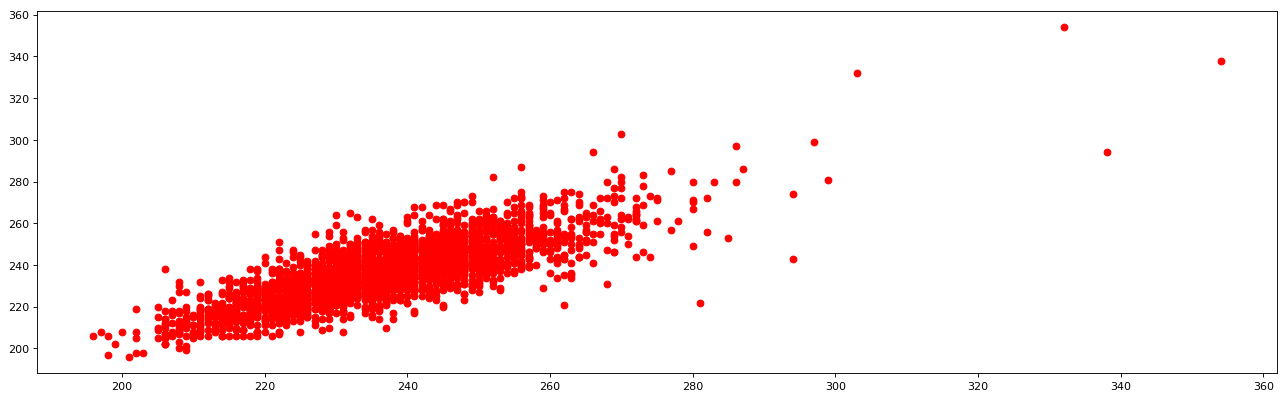

In [509]:
ds = '212'
mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
selected_colums = ['postRR', 'preRR', 'skewness', 'kurtosis', 'cD7', 'cD6', 'cD5', 'cD4']

plt.figure(figsize=(20, 6), dpi=80)

for i, features in enumerate(Testing_Data_DS_2[ds]):
    if features[1] > 1000:
        continue
    if Testing_Data_Label_DS_2[ds][i] in N:
        color = mark[0]
        plt.plot(features[0], features[1], color)
    elif Testing_Data_Label_DS_2[ds][i] in SVEB:
        color = mark[1]
        plt.plot(features[0], features[1], color)
    else:
        continue
plt.show()

In [653]:
for ds in DS2:
    NNN = {'preRR': [], 'skewness': [], 'kurtosis': []}
    SSS = {'preRR': [], 'skewness': [], 'kurtosis': []}
    ALL = {'preRR': [], 'skewness': [], 'kurtosis': []}
    for idx, label in enumerate(Testing_Data_Label_DS_2[ds]):
        if Testing_Data_DS_2[ds][idx][1] > 1000:
            continue
        ALL['preRR'].append(Testing_Data_DS_2[ds][idx][1])
        ALL['skewness'].append(Testing_Data_DS_2[ds][idx][2])
        ALL['kurtosis'].append(Testing_Data_DS_2[ds][idx][3])
        if label == 'N':
            NNN['preRR'].append(Testing_Data_DS_2[ds][idx][1])
            NNN['skewness'].append(Testing_Data_DS_2[ds][idx][2])
            NNN['kurtosis'].append(Testing_Data_DS_2[ds][idx][3])
        if label == 'S':
            SSS['preRR'].append(Testing_Data_DS_2[ds][idx][1])
            SSS['skewness'].append(Testing_Data_DS_2[ds][idx][2])
            SSS['kurtosis'].append(Testing_Data_DS_2[ds][idx][3])
    print(ds + ' N Median   ' + ': {' + str(np.median(NNN['preRR'])) + ',' + str(np.std(NNN['preRR'])) + '}') 
    print(ds + ' N Mean     ' + ': {' + str(np.mean(NNN['preRR'])) + ',' + str(np.std(NNN['preRR'])) + '}') 
    print(ds + ' S Median   ' + ': {' + str(np.median(SSS['preRR'])) + ',' + str(np.std(SSS['preRR'])) + '}')
    print(ds + ' S Mean     ' + ': {' + str(np.mean(SSS['preRR'])) + ',' + str(np.std(SSS['preRR'])) + '}')
    print(ds + ' ALL Median ' + ': {' + str(np.median(ALL['preRR'])) + ',' + str(np.std(ALL['preRR'])) + '}')
    print(ds + ' ALL Mean   ' + ': {' + str(np.mean(ALL['preRR'])) + ',' + str(np.std(ALL['preRR'])) + '}')
    print()

100 N Median   : {287.0,15.1082197986}
100 N Mean     : {287.185234899,15.1082197986}
100 S Median   : {215.0,14.6038600128}
100 S Mean     : {214.0,14.6038600128}
100 ALL Median : {287.0,17.5648608582}
100 ALL Mean   : {286.079330101,17.5648608582}

103 N Median   : {313.0,16.6532988625}
103 N Mean     : {311.875901876,16.6532988625}
103 S Median   : {270.0,8.0}
103 S Mean     : {270.0,8.0}
103 ALL Median : {313.0,16.6976360499}
103 ALL Mean   : {311.835655935,16.6976360499}

D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)




105 N Median   : {253.0,19.3999125999}
105 N Mean     : {254.143423138,19.3999125999}
105 S Median   : {nan,nan}
105 S Mean     : {nan,nan}
105 ALL Median : {253.0,23.2997979869}
105 ALL Mean   : {252.635797665,23.2997979869}

111 N Median   : {307.0,13.7677803978}
111 N Mean     : {305.982083923,13.7677803978}
111 S Median   : {nan,nan}
111 S Mean     : {nan,nan}
111 ALL Median : {307.0,13.8072149625}
111 ALL Mean   : {305.958529689,13.8072149625}

113 N Median   : {365.0,34.1317664088}
113 N Mean     : {362.883538634,34.1317664088}
113 S Median   : {180.0,7.475887164}
113 S Mean     : {180.666666667,7.475887164}
113 ALL Median : {365.0,35.6659853182}
113 ALL Mean   : {362.2734375,35.6659853182}

117 N Median   : {425.0,14.5780910044}
117 N Mean     : {423.690398432,14.5780910044}
117 S Median   : {211.0,0.0}
117 S Mean     : {211.0,0.0}
117 ALL Median : {425.0,15.5528435992}
117 ALL Mean   : {423.55156658,15.5528435992}

121 N Median   : {359.0,29.8971595273}
121 N Mean     : {349.

# Preparing SUP Data

In [1175]:
columns = ['ann', 'annIdx', 'beat', 'cA7', 'cD1', 'cD2', 'cD3', 'cD4', 'cD5', 'cD6', 'cD7', 
           'kurtosis', 'postRR', 'preRR', 'skewness', 'beatValues', 'beatIndex']
selected_colums = ['postRR', 'preRR', 'skewness', 'kurtosis', 'cD7', 'cD6', 'cD5', 'cD4']
SUP_Data_Label_DS_2 = {}
SUP_Data_DS_2 = {}
SUP_Data_Label_2 = []
SUP_Data_2 = []

for ds in SUP: 
    SUP_Data_Label_DS_2[ds] = []
    SUP_Data_DS_2[ds] = []
    dsLength = len(SUP_Hbs_lead0[ds]['beat'])
    for i in range(1, dsLength-1):
        if SUP_Hbs_lead0[ds]['ann'][i] in Non_beat_anns:
            continue
        elif SUP_Hbs_lead0[ds]['ann'][i] in N:
            SUP_Data_Label_2.append('N')
            SUP_Data_Label_DS_2[ds].append('N')
        elif SUP_Hbs_lead0[ds]['ann'][i] in SVEB:
            SUP_Data_Label_2.append('S')
            SUP_Data_Label_DS_2[ds].append('S')
        elif SUP_Hbs_lead0[ds]['ann'][i] in VEB:
            SUP_Data_Label_2.append('V')
            SUP_Data_Label_DS_2[ds].append('V')
        elif SUP_Hbs_lead0[ds]['ann'][i] in F:
            SUP_Data_Label_2.append('F')
            SUP_Data_Label_DS_2[ds].append('F')
        elif SUP_Hbs_lead0[ds]['ann'][i] in Q:
            SUP_Data_Label_2.append('Q')
            SUP_Data_Label_DS_2[ds].append('Q')
        else:
            continue
        
        # 逐个计算feature
        features = []
        for column in selected_colums:
            if type(SUP_Hbs_lead0[ds][column][i]) == list:
                features.extend(SUP_Hbs_lead0[ds][column][i])
            else:
                features.append(SUP_Hbs_lead0[ds][column][i])
        SUP_Data_2.append(features)
        SUP_Data_DS_2[ds].append(features)
SUP_Data_2 = preprocessing.scale(SUP_Data_2)

check distribution over features

In [ ]:
ds = '860'
mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
selected_colums = ['postRR', 'preRR', 'skewness', 'kurtosis', 'cD7', 'cD6', 'cD5', 'cD4']

plt.figure(figsize=(20, 6), dpi=80)

for i, features in enumerate(SUP_Data_DS_2[ds]):
    if features[1] > 1000:
        continue
    if SUP_Data_Label_DS_2[ds][i] in VEB:
        color = mark[0]
        plt.plot(features[2], features[3], color)
    elif SUP_Data_Label_DS_2[ds][i] in SVEB:
        color = mark[1]
        plt.plot(features[2], features[3], color)
    else:
        continue
plt.show()

In [1176]:
for ds in SUP:
    NNN = {'preRR': [], 'skewness': [], 'kurtosis': []}
    SSS = {'preRR': [], 'skewness': [], 'kurtosis': []}
    ALL = {'preRR': [], 'skewness': [], 'kurtosis': []}
    for idx, label in enumerate(SUP_Data_Label_DS_2[ds]):
        if SUP_Data_DS_2[ds][idx][1] > 1000:
            continue
        ALL['preRR'].append(SUP_Data_DS_2[ds][idx][1])
        ALL['skewness'].append(SUP_Data_DS_2[ds][idx][2])
        ALL['kurtosis'].append(SUP_Data_DS_2[ds][idx][3])
        if label == 'N':
            NNN['preRR'].append(SUP_Data_DS_2[ds][idx][1])
            NNN['skewness'].append(SUP_Data_DS_2[ds][idx][2])
            NNN['kurtosis'].append(SUP_Data_DS_2[ds][idx][3])
        if label == 'S':
            SSS['preRR'].append(SUP_Data_DS_2[ds][idx][1])
            SSS['skewness'].append(SUP_Data_DS_2[ds][idx][2])
            SSS['kurtosis'].append(SUP_Data_DS_2[ds][idx][3])
    print(ds + ' N Median   ' + ': {' + str(np.median(NNN['preRR'])) + ',' + str(np.std(NNN['preRR'])) + '}') 
    print(ds + ' N Mean     ' + ': {' + str(np.mean(NNN['preRR'])) + ',' + str(np.std(NNN['preRR'])) + '}') 
    print(ds + ' S Median   ' + ': {' + str(np.median(SSS['preRR'])) + ',' + str(np.std(SSS['preRR'])) + '}')
    print(ds + ' S Mean     ' + ': {' + str(np.mean(SSS['preRR'])) + ',' + str(np.std(SSS['preRR'])) + '}')
    print(ds + ' ALL Median ' + ': {' + str(np.median(ALL['preRR'])) + ',' + str(np.std(ALL['preRR'])) + '}')
    print(ds + ' ALL Mean   ' + ': {' + str(np.mean(ALL['preRR'])) + ',' + str(np.std(ALL['preRR'])) + '}')
    print()

851 N Median   : {251.0,36.9731605041}
851 N Mean     : {258.230733733,36.9731605041}
851 S Median   : {197.0,31.2697281478}
851 S Mean     : {198.78125,31.2697281478}
851 ALL Median : {246.0,45.6349109693}
851 ALL Mean   : {244.581333333,45.6349109693}

852 N Median   : {246.0,30.5886829218}
852 N Mean     : {251.371783877,30.5886829218}
852 S Median   : {159.0,28.6199694001}
852 S Mean     : {169.320872274,28.6199694001}
852 ALL Median : {243.0,40.5396502715}
852 ALL Mean   : {241.287377911,40.5396502715}

853 N Median   : {290.0,23.7456925908}
853 N Mean     : {292.880703422,23.7456925908}
853 S Median   : {220.0,19.2067967571}
853 S Mean     : {210.875,19.2067967571}
853 ALL Median : {290.0,31.7684623803}
853 ALL Mean   : {288.128815081,31.7684623803}

854 N Median   : {260.0,36.4243768429}
854 N Mean     : {261.092841163,36.4243768429}
854 S Median   : {182.0,21.8283109901}
854 S Mean     : {183.530434783,21.8283109901}
854 ALL Median : {235.0,48.4215074199}
854 ALL Mean   : {235.

D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Preparing INCART Data

In [1687]:
columns = ['ann', 'annIdx', 'beat', 'cA7', 'cD1', 'cD2', 'cD3', 'cD4', 'cD5', 'cD6', 'cD7', 
           'kurtosis', 'postRR', 'preRR', 'skewness', 'beatValues', 'beatIndex']
selected_colums = ['postRR', 'preRR', 'skewness', 'kurtosis', 'cD7', 'cD6', 'cD5', 'cD4']
INCART_Data_Label_DS_2 = {}
INCART_Data_DS_2 = {}
INCART_Data_Label_2 = []
INCART_Data_2 = []

for ds in INCART: 
    INCART_Data_Label_DS_2[ds] = []
    INCART_Data_DS_2[ds] = []
    dsLength = len(INCART_Hbs_lead1[ds]['beat'])
    for i in range(1, dsLength-1):
        if INCART_Hbs_lead1[ds]['ann'][i] in Non_beat_anns:
            continue
        elif INCART_Hbs_lead1[ds]['ann'][i] in N:
            INCART_Data_Label_2.append('N')
            INCART_Data_Label_DS_2[ds].append('N')
        elif INCART_Hbs_lead1[ds]['ann'][i] in SVEB:
            INCART_Data_Label_2.append('S')
            INCART_Data_Label_DS_2[ds].append('S')
        elif INCART_Hbs_lead1[ds]['ann'][i] in VEB:
            INCART_Data_Label_2.append('V')
            INCART_Data_Label_DS_2[ds].append('V')
        elif INCART_Hbs_lead1[ds]['ann'][i] in F:
            INCART_Data_Label_2.append('F')
            INCART_Data_Label_DS_2[ds].append('F')
        elif INCART_Hbs_lead1[ds]['ann'][i] in Q:
            INCART_Data_Label_2.append('Q')
            INCART_Data_Label_DS_2[ds].append('Q')
        else:
            continue
        
        # 逐个计算feature
        features = []
        for column in selected_colums:
            if type(INCART_Hbs_lead1[ds][column][i]) == list:
                features.extend(INCART_Hbs_lead1[ds][column][i])
            else:
                features.append(INCART_Hbs_lead1[ds][column][i])
        INCART_Data_2.append(features)
        INCART_Data_DS_2[ds].append(features)
INCART_Data_2 = preprocessing.scale(INCART_Data_2)

In [1688]:
for ds in INCART:
    NNN = {'preRR': [], 'skewness': [], 'kurtosis': []}
    SSS = {'preRR': [], 'skewness': [], 'kurtosis': []}
    ALL = {'preRR': [], 'skewness': [], 'kurtosis': []}
    for idx, label in enumerate(INCART_Data_Label_DS_2[ds]):
        if INCART_Data_DS_2[ds][idx][1] > 1000:
            continue
        ALL['preRR'].append(INCART_Data_DS_2[ds][idx][1])
        ALL['skewness'].append(INCART_Data_DS_2[ds][idx][2])
        ALL['kurtosis'].append(INCART_Data_DS_2[ds][idx][3])
        if label == 'N':
            NNN['preRR'].append(INCART_Data_DS_2[ds][idx][1])
            NNN['skewness'].append(INCART_Data_DS_2[ds][idx][2])
            NNN['kurtosis'].append(INCART_Data_DS_2[ds][idx][3])
        if label == 'S':
            SSS['preRR'].append(INCART_Data_DS_2[ds][idx][1])
            SSS['skewness'].append(INCART_Data_DS_2[ds][idx][2])
            SSS['kurtosis'].append(INCART_Data_DS_2[ds][idx][3])
    print(ds + ' N Median   ' + ': {' + str(np.median(NNN['preRR'])) + ',' + str(np.std(NNN['preRR'])) + '}') 
    print(ds + ' N Mean     ' + ': {' + str(np.mean(NNN['preRR'])) + ',' + str(np.std(NNN['preRR'])) + '}') 
    print(ds + ' S Median   ' + ': {' + str(np.median(SSS['preRR'])) + ',' + str(np.std(SSS['preRR'])) + '}')
    print(ds + ' S Mean     ' + ': {' + str(np.mean(SSS['preRR'])) + ',' + str(np.std(SSS['preRR'])) + '}')
    print(ds + ' ALL Median ' + ': {' + str(np.median(ALL['preRR'])) + ',' + str(np.std(ALL['preRR'])) + '}')
    print(ds + ' ALL Mean   ' + ': {' + str(np.mean(ALL['preRR'])) + ',' + str(np.std(ALL['preRR'])) + '}')
    print()

I60 N Median   : {248.0,46.9355906863}
I60 N Mean     : {259.726132686,46.9355906863}
I60 S Median   : {nan,nan}
I60 S Mean     : {nan,nan}
I60 ALL Median : {248.0,46.9355906863}
I60 ALL Mean   : {259.726132686,46.9355906863}

I61 N Median   : {443.0,28.4732536814}
I61 N Mean     : {442.252239835,28.4732536814}
I61 S Median   : {292.0,0.0}
I61 S Mean     : {292.0,0.0}
I61 ALL Median : {443.0,28.7350855765}
I61 ALL Mean   : {442.148760331,28.7350855765}

I62 N Median   : {315.0,52.7196135334}
I62 N Mean     : {312.973121985,52.7196135334}
I62 S Median   : {201.0,41.7319488588}
I62 S Mean     : {208.0,41.7319488588}
I62 ALL Median : {277.0,61.1913919215}
I62 ALL Mean   : {283.198059109,61.1913919215}

I63 N Median   : {328.0,29.2018927925}
I63 N Mean     : {328.692682927,29.2018927925}
I63 S Median   : {220.0,0.0}
I63 S Mean     : {220.0,0.0}
I63 ALL Median : {327.0,39.255869394}
I63 ALL Mean   : {322.345381526,39.255869394}

I64 N Median   : {338.0,24.6511157462}
I64 N Mean     : {337.4

D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Training

### ------------------------------------------------------------------ 1 -------------------------------------------------------------------------------------

Classifier Training

In [13]:
clf_1 = SVC(kernel='rbf', decision_function_shape='ovr')
clf_1.fit(Training_Data_1, Training_Data_Label_1) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### ------------------------------------------------------------------ 2 -------------------------------------------------------------------------------------

Treshold Training

In [1014]:
tresholds = {}
step = 0.02

for ds in DS1:
    print(ds)
    max_value = 0
    max_t = 0
    t_value = -0.2
    dsLength = len(Training_Hbs_lead0[ds]['beat'])
    
    while t_value > -0.6:
        label_true = []
        label_pred = []
        N_Pre_RR = []
        S_Pre_RR = []
        for i in range(1, dsLength-1):
            #if Training_Hbs_lead0[ds]['preRR'][i] > 1000:
             #   continue
            if Training_Hbs_lead0[ds]['ann'][i] in N:
                label_true.append('N')
                N_Pre_RR.append(Training_Hbs_lead0[ds]['preRR'][i])
            elif Training_Hbs_lead0[ds]['ann'][i] in SVEB:
                label_true.append('S')
                S_Pre_RR.append(Training_Hbs_lead0[ds]['preRR'][i])
            else:
                continue
        
            #mean_pre_rr = np.mean(Training_Hbs_lead0[ds]['preRR'][1:])  #对DS2效果最好
            mean_pre_rr = max(np.mean(Training_Hbs_lead0[ds]['preRR'][1:]), np.median(Training_Hbs_lead0[ds]['preRR'][1:]))
            #mean_pre_rr = (np.mean(N_Pre_RR) + np.median(N_Pre_RR))/2
        
            if (Training_Hbs_lead0[ds]['preRR'][i] - Training_Hbs_lead0[ds]['postRR'][i]) / mean_pre_rr < t_value:
                label_pred.append('S')
            elif (Training_Hbs_lead0[ds]['preRR'][i] - mean_pre_rr) / mean_pre_rr < t_value:
                label_pred.append('S')
            else:
                label_pred.append('N')
        
        if len(S_Pre_RR) == 0:
            max_t = t_value
            break
            
        N_Result = list(confusion_matrix(label_true, label_pred, labels=['N', 'S'])[0])
        S_Result = list(confusion_matrix(label_true, label_pred, labels=['N', 'S'])[1])
        N_Spec = N_Result[0] / (N_Result[0] + N_Result[1])
        S_Spec = S_Result[1] / (S_Result[0] + S_Result[1])
        if N_Spec + S_Spec > max_value:
            max_value = N_Spec + S_Spec
            max_t = t_value
        t_value -= step
    tresholds[ds] = [np.mean(N_Pre_RR), np.std(N_Pre_RR), max_t]


101
106
108
109
112
114
115
116
118
119
122
124
201
203
205
207
208
209
215
220
223
230


In [990]:
tresholds

{'101': [348.66720516962846, 25.17908215432, -0.2],
 '106': [367.38338870431892, 57.087551719040803, -0.2],
 '108': [370.72769142199195, 40.452935033402667, -0.5000000000000002],
 '109': [257.34150261149057, 12.645993125788825, -0.2],
 '112': [256.04577742699291, 7.7005081326221347, -0.2],
 '114': [348.7981298129813, 44.594067605336349, -0.22],
 '115': [332.92102564102566, 31.367138103343351, -0.2],
 '116': [273.67246628969116, 20.63673636570984, -0.24],
 '118': [288.92140545538604, 29.274891127796593, -0.2],
 '119': [365.25827384815057, 67.625314286789418, -0.2],
 '122': [262.55155681358673, 14.444165497012348, -0.2],
 '124': [404.43770384866275, 28.670147629765626, -0.2],
 '201': [340.9804041641151, 133.17138162846246, -0.3400000000000001],
 '203': [232.2837356549268, 68.501530349935322, -0.32000000000000006],
 '205': [247.15070093457945, 16.628273677384527, -0.2],
 '207': [345.06485084306098, 212.48987389456329, -0.42000000000000015],
 '208': [244.78282828282829, 46.36585470914892, 

Check above Result

In [335]:
ds = '207'
ttt = -0.14
rrrr = []
real = []
dsLength = len(Training_Hbs_lead0[ds]['beat'])
for i in range(1, dsLength-1):
    if Training_Hbs_lead0[ds]['preRR'][i] > 1000:
        continue
    if Training_Hbs_lead0[ds]['ann'][i] in N:
        real.append('N')
    elif Training_Hbs_lead0[ds]['ann'][i] in SVEB:
        real.append('S')
    else:
        continue
        
    me = np.mean(Training_Hbs_lead0[ds]['preRR'][1:])
    if (Training_Hbs_lead0[ds]['preRR'][i] - Training_Hbs_lead0[ds]['postRR'][i]) / me < ttt:
        rrrr.append('S')
    elif (Training_Hbs_lead0[ds]['preRR'][i] - me) / me < ttt:
        rrrr.append('S')
    else:
        rrrr.append('N')

confusion_matrix(real, rrrr, labels=['N', 'S'])   

array([[1098,  439],
       [   0,  106]], dtype=int64)

S_V Classifier Training

In [553]:
Training_Data_2[1][]

array([ 0.31239211,  0.22834703,  0.8458107 ,  1.14379641,  0.29825978,
       -0.25794329, -0.4496015 , -0.53170662, -0.20842206,  0.59653996,
       -0.01276096,  0.51226308,  0.31359264,  0.0826024 ,  0.20081946,
       -0.57965195,  0.51413261,  0.        ,  0.10267241, -0.237055  ,
       -0.47643094,  0.74893263,  0.35798413, -0.53856392, -0.35992489,
        0.1410865 ,  0.11135279,  0.20638357, -0.30503849, -0.65887837,
       -0.21836847,  0.75554872,  0.07607732])

In [1454]:
S_V_Train = []
S_V_Label = []

for idx, label in enumerate(Training_Data_Label_2):
    if label == 'N':
        continue
    S_V_Label.append(label)
    #S_V_Train.append(Training_Data_2[idx][2:]) #这个配置对DS2效果好
    S_V_Train.append(Training_Data_2[idx][2:])

In [1455]:
clf_SV = SVC(kernel='rbf', class_weight={'S':3, 'V':1})
clf_SV.fit(S_V_Train, S_V_Label) 

SVC(C=1.0, cache_size=200, class_weight={'S': 3, 'V': 1}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [735]:
confusion_matrix(clf_SV.predict(S_V_Train), S_V_Label, labels=['S', 'V', 'F','Q'])

array([[ 933,   66,   26,    4],
       [  10, 3711,   49,    4],
       [   0,    9,  339,    0],
       [   0,    0,    0,    0]], dtype=int64)

N_V Classifier Training

In [572]:
N_V_Train = []
N_V_Label = []

for idx, label in enumerate(Training_Data_Label_2):
    if label == 'S':
        continue
    N_V_Label.append(label)
    N_V_Train.append(Training_Data_2[idx][:-2]) #这个配置对DS2效果好

In [921]:
clf_NV = SVC(kernel='rbf', class_weight={'N':1, 'V':1, 'F':0.1})
clf_NV.fit(N_V_Train, N_V_Label) 

SVC(C=1.0, cache_size=200, class_weight={'N': 1, 'V': 1, 'F': 0.1}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [917]:
confusion_matrix(clf_NV.predict(N_V_Train), N_V_Label, labels=['N', 'V', 'F','Q'])

array([[45803,    62,    81,     4],
       [    4,  3717,    17,     0],
       [    1,     7,   316,     0],
       [    0,     0,     0,     4]], dtype=int64)

### ------------------------------------------------------------- DESLib ----------------------------------------------------------------------------------

In [310]:
from deslib.des.knop import KNOP
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV

In [317]:
temp_label_1 = []
for label in Training_Data_Label_1:
    if label in N:
        temp_label_1.append(0)
    elif label in SVEB:
        temp_label_1.append(1)
    elif label in VEB:
        temp_label_1.append(2)
    elif label in Q:
        temp_label_1.append(3)
    elif label in F:
        temp_label_1.append(4)
    else:
        continue

In [318]:
X_train, X_dsel, y_train, y_dsel = train_test_split(Training_Data_1, temp_label_1, test_size=0.5)

In [319]:
model_perceptron = CalibratedClassifierCV(Perceptron(max_iter=100)).fit(X_train, y_train)
model_linear_svm = CalibratedClassifierCV(LinearSVC()).fit(X_train, y_train)
model_svc = SVC(probability=True).fit(X_train, y_train)
model_bayes = GaussianNB().fit(X_train, y_train)
model_tree = DecisionTreeClassifier().fit(X_train, y_train)
model_knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
pool_classifiers = [model_perceptron, model_linear_svm, model_svc, model_bayes,  model_tree, model_knn]

D:\Anaconda3\lib\site-packages\sklearn\calibration.py:435: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
D:\Anaconda3\lib\site-packages\sklearn\calibration.py:445: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
D:\Anaconda3\lib\site-packages\sklearn\calibration.py:447: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
D:\Anaconda3\lib\site-packages\sklearn\calibration.py:435: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
D:\Anaconda3\lib\site-packages\sklearn\calibration.py:435: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
D:\Anaconda3\lib\site-packages\sklearn\calibration.py:445: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
D:\Anaconda3\lib\site-packages\sklearn\calibration.py:447: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
D:\Anaconda3\lib\site-package

In [321]:
knop = KNOP(pool_classifiers)
knop.fit(X_dsel, np.array(y_dsel))

D:\Anaconda3\lib\site-packages\sklearn\calibration.py:510: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(self.a_ * T + self.b_))


# Testing

### ------------------------------------------------------------------ 1 -------------------------------------------------------------------------------------

Prediction

In [675]:
result_1 = clf_1.predict(SUP_Data_2)

### ------------------------------------------------------------------ 2 -------------------------------------------------------------------------------------

Determine The Treshold Value for Each Dataset

In [1092]:
Test_Pre_RR = {}
Test_Nearest = {}
for ds in DS2:
    temp = []
    dsLength = len(Testing_Hbs_lead0[ds]['beat'])
    for i in range(1, dsLength):
        if Testing_Hbs_lead0[ds]['preRR'][i] > 1100:
            continue
        else:
            temp.append(Testing_Hbs_lead0[ds]['preRR'][i])
    Test_Pre_RR[ds] = [max(np.mean(temp), np.median(temp)), np.std(temp)]
    minDis = 999
    neighbor = -1
    for ds_1 in DS1:
        if tresholds[ds_1][2] == -0.2:
            continue
        elif tresholds[ds_1][0] < Test_Pre_RR[ds][0]:
            continue
        else:
            temp1 = abs(Test_Pre_RR[ds][0] - tresholds[ds_1][0]) 
            if temp1 < minDis:
                minDis = temp1
                neighbor = ds_1
    if neighbor == -1:
        neighbor = '124'
    Test_Nearest[ds] = [neighbor, round(tresholds[neighbor][2], 2)]

Prediction of Each Dataset

In [823]:
Test_Nearest['232'][1]

-0.1

In [1093]:
n2n = 0
n2s = 0
s2s = 0
s2n = 0

for ds in DS2:
    rrrr = []
    real = []
    
    if np.std(Testing_Hbs_lead0[ds]['preRR'][1:]) > 45:
        if abs(np.mean(Testing_Hbs_lead0[ds]['preRR'][1:]) - np.median(Testing_Hbs_lead0[ds]['preRR'][1:])) > 30:
            Test_Nearest[ds][1] = -(math.floor(Test_Nearest[ds][1] * (-10) - 0.1))/10
        
    dsLength = len(Testing_Hbs_lead0[ds]['beat'])
    for i in range(1, dsLength-1):
        if Testing_Hbs_lead0[ds]['preRR'][i] > 1000:
            continue
        if Testing_Hbs_lead0[ds]['ann'][i] in N:
            real.append('N')
        elif Testing_Hbs_lead0[ds]['ann'][i] in SVEB:
            real.append('S')
        else:
            continue

        #me = np.mean(Testing_Hbs_lead0[ds]['preRR'][1:])
        me = max(np.mean(Testing_Hbs_lead0[ds]['preRR'][1:]),np.median(Testing_Hbs_lead0[ds]['preRR'][1:]))
        if (Testing_Hbs_lead0[ds]['preRR'][i] - Testing_Hbs_lead0[ds]['postRR'][i]) / me < Test_Nearest[ds][1]:
            rrrr.append('S')
        elif (Testing_Hbs_lead0[ds]['preRR'][i] - me) / me < Test_Nearest[ds][1]:
            rrrr.append('S')
        else:
            rrrr.append('N')
    
    n2n += confusion_matrix(real, rrrr, labels=['N', 'S'])[0][0]
    n2s += confusion_matrix(real, rrrr, labels=['N', 'S'])[0][1]
    s2n += confusion_matrix(real, rrrr, labels=['N', 'S'])[1][0]
    s2s += confusion_matrix(real, rrrr, labels=['N', 'S'])[1][1]
                            
    print(ds + ':')
    print(confusion_matrix(real, rrrr, labels=['N', 'S']))
    print()
print(n2n, n2s)
print(s2n, s2s)

100:
[[2234    1]
 [   0   33]]

103:
[[2079    0]
 [   1    1]]

105:
[[2520    4]
 [   0    0]]

111:
[[2120    1]
 [   0    0]]

113:
[[1783    3]
 [   0    6]]

117:
[[1530    1]
 [   0    1]]

121:
[[1858    0]
 [   0    1]]

123:
[[1485   27]
 [   0    0]]

200:
[[1734    7]
 [   9   21]]

202:
[[1626  432]
 [   4   51]]

210:
[[2258  161]
 [   0   22]]

212:
[[2745    0]
 [   0    0]]

213:
[[2636    2]
 [   5   23]]

214:
[[1999    0]
 [   0    0]]

219:
[[1906  173]
 [   5    2]]

221:
[[1815  214]
 [   0    0]]

222:
[[1586  684]
 [   4  205]]

228:
[[1686    0]
 [   1    2]]

231:
[[1292  273]
 [   1    0]]

232:
[[ 335   20]
 [   3 1378]]

233:
[[2227    0]
 [   0    7]]

234:
[[2698    0]
 [  49    1]]

42152 2003
82 1754


Perform the whole idea testing

In [1701]:
N_Set = []
N_Id = []
S_Set = []
S_Id = []
result_2 = []
real_label = []
selected_colums = ['postRR', 'preRR', 'skewness', 'kurtosis', 'cD7', 'cD6', 'cD5', 'cD4']

for ds in DS2:
    dsLength = len(Testing_Hbs_lead0[ds]['beat'])
    for i in range(1, dsLength-1):
        if Testing_Hbs_lead0[ds]['ann'][i] in N:
            real_label.append('N')
        elif Testing_Hbs_lead0[ds]['ann'][i] in SVEB:
            real_label.append('S')
        elif Testing_Hbs_lead0[ds]['ann'][i] in VEB:
            real_label.append('V')
        elif Testing_Hbs_lead0[ds]['ann'][i] in F:
            real_label.append('F')
        elif Testing_Hbs_lead0[ds]['ann'][i] in Q:
            real_label.append('Q')
        else:
            continue
        
        features = []
        for column in selected_colums:
            if type(Testing_Hbs_lead0[ds][column][i]) == list:
                features.extend(Testing_Hbs_lead0[ds][column][i])
            else:
                features.append(Testing_Hbs_lead0[ds][column][i])
                
        #me = np.mean(Testing_Hbs_lead0[ds]['preRR'][1:])
        me = max(np.mean(Testing_Hbs_lead0[ds]['preRR'][1:]),np.median(Testing_Hbs_lead0[ds]['preRR'][1:]))
        if (Testing_Hbs_lead0[ds]['preRR'][i] - Testing_Hbs_lead0[ds]['postRR'][i]) / me < Test_Nearest[ds][1]:
            result_2.append('S')
            S_Set.append(features)
            S_Id.append(len(result_2)-1)
        elif (Testing_Hbs_lead0[ds]['preRR'][i] - me) / me < Test_Nearest[ds][1]:
            result_2.append('S')
            S_Set.append(features)
            S_Id.append(len(result_2)-1)
        else:
            result_2.append('N')
            N_Set.append(features)
            N_Id.append(len(result_2)-1)
            
total = []
total.extend(list(N_Set))
total.extend(list(S_Set))
normalized_total = preprocessing.scale(total)
Norlize_N_Set = normalized_total[:len(N_Set)]
Norlize_S_Set = normalized_total[len(N_Set):]

In [1702]:
tempN = []
for i in Norlize_N_Set:
    tempN.append(i[0:-2])
N_result = clf_NV.predict(tempN)
for idx, resultId in enumerate(N_Id):
    result_2[resultId] = N_result[idx]

In [ ]:
transform = {0.0: 'N', 1.0: 'S', 2.0: 'V', 3.0: 'Q', 4.0: 'F'}
N_result = knop.predict(Norlize_N_Set)
for idx, resultId in enumerate(N_Id):
    result_2[resultId] = transform[N_result[idx]]

In [1703]:
tempS = []
for i in Norlize_S_Set:
    tempS.append(i[2:])
S_result = clf_SV.predict(tempS)
for idx, resultId in enumerate(S_Id):
    result_2[resultId] = S_result[idx]

In [539]:
transform [0]

'N'

In [439]:
knop.predict(Norlize_N_Set[:10])[0] == 0

True

In [1704]:
confusion_matrix(real_label, result_2, labels=['N', 'S', 'V','F','Q'])

array([[40420,  1863,  1898,    17,     0],
       [   77,  1576,   180,     3,     0],
       [   46,   105,  3065,     3,     0],
       [  230,     1,   157,     0,     0],
       [    1,     0,     6,     0,     0]], dtype=int64)

In [1705]:
accuracy_score(real_label, result_2)

0.90760957138253306

In [1709]:
a = confusion_matrix(real_label, result_2, labels=['N', 'S', 'V','F','Q'])

    
print('DS2' + ' & ' 
      + str(sum(a[0])) + ' & ' 
      + str(sum(a[1])) + ' & ' 
      + str(sum(a[2])) + ' && ' 
      + str(round(accuracy_score(real_label, result_2) * 100, 2)) + ' & ' 
      + str(round(a[0][0]/sum(a[0]) * 100, 2)) + ' & ' 
      + str(round(a[0][0]/sum(a[:, 0]) * 100, 2)) + ' && ' 
      + str(round(a[1][1]/sum(a[1]) * 100, 2) ) + ' & '
      + str(round(a[1][1]/sum(a[:, 1]) * 100, 2)) + ' && '
      + str(round(a[2][2]/sum(a[2]) * 100, 2)) + ' & '
      + str(round(a[2][2]/sum(a[:, 2]) * 100, 2)) + ' & \\\\'
     )

print()

print('ACC: ' + str(accuracy_score(real_label, result_2)))
print()
print('N Total: ' + str(sum(a[0])))
print('S Total: ' + str(sum(a[1])))
print('V Total: ' + str(sum(a[2])))
print()
print('N Sen: ' + str(round(a[0][0]/sum(a[0]), 2)))
print('N +P: ' + str(round(a[0][0]/sum(a[:, 0]), 2)))
print()
print('S Sen: ' + str(round(a[1][1]/sum(a[1]), 2)))
print('S +P: ' + str(round(a[1][1]/sum(a[:, 1]), 2)))
print()
print('V Sen: ' + str(round(a[2][2]/sum(a[2]), 2)))
print('V +P: ' + str(round(a[2][2]/sum(a[:, 2]), 2)))

DS2 & 44198 & 1836 & 3219 && 90.76 & 91.45 & 99.13 && 85.84 & 44.46 && 95.22 & 57.76 & \\

ACC: 0.907609571383

N Total: 44198
S Total: 1836
V Total: 3219

N Sen: 0.91
N +P: 0.99

S Sen: 0.86
S +P: 0.44

V Sen: 0.95
V +P: 0.58


### ------------------------------------------------------------- SUP ----------------------------------------------------------------------------------

In [1177]:
Test_Pre_RR_SUP = {}
Test_Nearest_SUP = {}
for ds in SUP:
    temp = []
    dsLength = len(SUP_Hbs_lead0[ds]['beat'])
    for i in range(1, dsLength):
        if SUP_Hbs_lead0[ds]['preRR'][i] > 1100:
            continue
        else:
            temp.append(SUP_Hbs_lead0[ds]['preRR'][i])
    Test_Pre_RR_SUP[ds] = [max(np.mean(temp), np.median(temp)), np.std(temp)]
    minDis = 999
    neighbor = -1
    for ds_1 in DS1:
        if tresholds[ds_1][2] == -0.2:
            continue
        elif tresholds[ds_1][0] < Test_Pre_RR_SUP[ds][0]:
            continue
        else:
            temp1 = abs(Test_Pre_RR_SUP[ds][0] - tresholds[ds_1][0]) 
            if temp1 < minDis:
                minDis = temp1
                neighbor = ds_1
    if neighbor == -1:
        neighbor = '124'
    Test_Nearest_SUP[ds] = [neighbor, round(tresholds[neighbor][2], 2)]

In [1178]:
Test_Nearest_SUP

{'851': ['116', -0.24],
 '852': ['208', -0.48],
 '853': ['201', -0.4],
 '854': ['208', -0.48],
 '855': ['116', -0.24],
 '856': ['203', -0.3],
 '857': ['116', -0.24],
 '858': ['201', -0.4],
 '859': ['203', -0.3],
 '860': ['116', -0.24],
 '861': ['116', -0.24],
 '862': ['201', -0.4],
 '863': ['203', -0.3],
 '864': ['101', -0.22],
 '865': ['203', -0.3],
 '866': ['116', -0.24],
 '867': ['203', -0.3],
 '868': ['203', -0.3],
 '869': ['201', -0.4],
 '870': ['208', -0.48],
 '871': ['108', -0.5],
 '872': ['201', -0.4],
 '873': ['124', -0.24],
 '874': ['118', -0.22],
 '875': ['201', -0.4],
 '876': ['201', -0.4],
 '877': ['201', -0.4],
 '878': ['201', -0.4],
 '879': ['201', -0.4],
 '880': ['203', -0.3],
 '881': ['118', -0.22],
 '882': ['201', -0.4],
 '883': ['108', -0.5],
 '884': ['203', -0.3],
 '885': ['201', -0.4],
 '886': ['201', -0.4],
 '887': ['208', -0.48],
 '888': ['118', -0.22],
 '889': ['124', -0.24],
 '890': ['201', -0.4],
 '891': ['116', -0.24],
 '892': ['203', -0.3],
 '893': ['116', -

In [1043]:
Test_Nearest_SUP['865'][1]= -0.2

In [1179]:
n2n = 0
n2s = 0
s2s = 0
s2n = 0

for ds in SUP:
    rrrr = []
    real = []
    
    if np.std(SUP_Hbs_lead0[ds]['preRR'][1:]) > 45:
        if abs(np.mean(SUP_Hbs_lead0[ds]['preRR'][1:]) - np.median(SUP_Hbs_lead0[ds]['preRR'][1:])) > 30:
            Test_Nearest_SUP[ds][1] = -(math.floor(Test_Nearest_SUP[ds][1] * (-10) - 0.1))/10
            
    dsLength = len(SUP_Hbs_lead0[ds]['beat'])
    for i in range(1, dsLength-1):
        if SUP_Hbs_lead0[ds]['preRR'][i] > 1000:
            continue
        if SUP_Hbs_lead0[ds]['ann'][i] in N:
            real.append('N')
        elif SUP_Hbs_lead0[ds]['ann'][i] in SVEB:
            real.append('S')
        else:
            continue

        #me = np.mean(SUP_Hbs_lead0[ds]['preRR'][1:])
        me = max(np.mean(SUP_Hbs_lead0[ds]['preRR'][1:]), np.median(SUP_Hbs_lead0[ds]['preRR'][1:]))
        
        if (SUP_Hbs_lead0[ds]['preRR'][i] - SUP_Hbs_lead0[ds]['postRR'][i]) / me < Test_Nearest_SUP[ds][1]:
            rrrr.append('S')
        elif (SUP_Hbs_lead0[ds]['preRR'][i] - me) / me < Test_Nearest_SUP[ds][1]:
            rrrr.append('S')
        else:
            rrrr.append('N')
    
    n2n += confusion_matrix(real, rrrr, labels=['N', 'S'])[0][0]
    n2s += confusion_matrix(real, rrrr, labels=['N', 'S'])[0][1]
    s2n += confusion_matrix(real, rrrr, labels=['N', 'S'])[1][0]
    s2s += confusion_matrix(real, rrrr, labels=['N', 'S'])[1][1]
                            
    print(ds + ':')
    print(confusion_matrix(real, rrrr, labels=['N', 'S']))
    print()
print(n2n, n2s)
print(s2n, s2s)

851:
[[2085   82]
 [  12   20]]

852:
[[2298   34]
 [ 123  198]]

853:
[[2100    4]
 [  10   38]]

854:
[[1785    3]
 [ 410   50]]

855:
[[1870  162]
 [  48  179]]

856:
[[2809    0]
 [   9    3]]

857:
[[2325   74]
 [   3   34]]

858:
[[2167    0]
 [   1    7]]

859:
[[2999    6]
 [  64    5]]

860:
[[1672    0]
 [   8    9]]

861:
[[1800   73]
 [  15  554]]

862:
[[2129    3]
 [  23    3]]

863:
[[2557    3]
 [  59  262]]

864:
[[1736    6]
 [   2   17]]

865:
[[1082   18]
 [  92 1726]]

866:
[[1464  586]
 [   3  164]]

867:
[[1238 1548]
 [  27  109]]

868:
[[2398  154]
 [  91  136]]

869:
[[1489   16]
 [ 274  357]]

870:
[[1784    1]
 [ 340  114]]

871:
[[1773    0]
 [   5    7]]

872:
[[1895    0]
 [   0    9]]

873:
[[1623    0]
 [   0   15]]

874:
[[2183    3]
 [   0    9]]

875:
[[1943    0]
 [   7    1]]

876:
[[2000    4]
 [ 112   23]]

877:
[[1833    4]
 [  62  134]]

878:
[[1588    0]
 [  18   46]]

879:
[[1469    0]
 [   5   43]]

880:
[[3093    9]
 [  56  185]]

881:
[[124

In [ ]:
#SUP = ['800', '801', '802', '803', '804', '805', '806', '807', '808', '809', '810', '811', '812', '820', '821', 
#       '822', '823', '824', '825', '826', '827', '828', '829', '840', '841', '842', '843', '844', '845', '846', 
#       '847', '848', '849', '850']

In [1169]:
N_Set_SUP = []
N_Id_SUP = []
S_Set_SUP = []
S_Id_SUP = []
result_SUP = []
real_label_SUP = []
DS_SUP = []
selected_colums = ['postRR', 'preRR', 'skewness', 'kurtosis', 'cD7', 'cD6', 'cD5', 'cD4']

for ds in SUP:
#for ds in ['822']:
    dsLength = len(SUP_Hbs_lead0[ds]['beat'])
    for i in range(1, dsLength-1):
        if SUP_Hbs_lead0[ds]['ann'][i] in N:
            real_label_SUP.append('N')
        elif SUP_Hbs_lead0[ds]['ann'][i] in SVEB:
            real_label_SUP.append('S')
        elif SUP_Hbs_lead0[ds]['ann'][i] in VEB:
            real_label_SUP.append('V')
        elif SUP_Hbs_lead0[ds]['ann'][i] in F:
            real_label_SUP.append('F')
        elif SUP_Hbs_lead0[ds]['ann'][i] in Q:
            real_label_SUP.append('Q')
        else:
            continue
        
        features = []
        for column in selected_colums:
            if type(SUP_Hbs_lead0[ds][column][i]) == list:
                features.extend(SUP_Hbs_lead0[ds][column][i])
            else:
                features.append(SUP_Hbs_lead0[ds][column][i])
        DS_SUP.append(features)       
        me = max(np.mean(SUP_Hbs_lead0[ds]['preRR'][1:]), np.median(SUP_Hbs_lead0[ds]['preRR'][1:]))
        if (SUP_Hbs_lead0[ds]['preRR'][i] - SUP_Hbs_lead0[ds]['postRR'][i]) / me < Test_Nearest_SUP[ds][1]:
            result_SUP.append('S')
            S_Set_SUP.append(features)
            S_Id_SUP.append(len(result_SUP)-1)
        elif (SUP_Hbs_lead0[ds]['preRR'][i] - me) / me < Test_Nearest_SUP[ds][1]:
            result_SUP.append('S')
            S_Set_SUP.append(features)
            S_Id_SUP.append(len(result_SUP)-1)
        else:
            result_SUP.append('N')
            N_Set_SUP.append(features)
            N_Id_SUP.append(len(result_SUP)-1)
            
total_SUP = []
total_SUP.extend(list(N_Set_SUP))
total_SUP.extend(list(S_Set_SUP))
normalized_total_SUP = preprocessing.scale(total_SUP)
Norlize_N_Set_SUP = normalized_total_SUP[:len(N_Set_SUP)]
Norlize_S_Set_SUP = normalized_total_SUP[len(N_Set_SUP):]

In [1170]:
tempN_SUP = []
for i in Norlize_N_Set_SUP:
    tempN_SUP.append(i[0:-2])
N_result_SUP = clf_NV.predict(tempN_SUP)
for idx, resultId in enumerate(N_Id_SUP):
    result_SUP[resultId] = N_result_SUP[idx]

In [1171]:
tempS_SUP = []
for i in Norlize_S_Set_SUP:
    #tempS_SUP.append(i[2:])
    tempS_SUP.append(i[2:])
S_result_SUP = clf_SV.predict(tempS_SUP)
for idx, resultId in enumerate(S_Id_SUP):
    result_SUP[resultId] = S_result_SUP[idx]

In [1172]:
confusion_matrix(real_label_SUP, result_SUP, labels=['N', 'S', 'V','F','Q'])

array([[65364,  1232,  6165,     4,     0],
       [ 1223,  1695,   411,    42,     0],
       [   59,   281,  1219,     9,     0],
       [    3,     1,     1,     0,     0],
       [    6,    15,     7,     0,     0]], dtype=int64)

In [890]:
a = confusion_matrix(real_label_SUP, result_SUP, labels=['N', 'S', 'V','F','Q'])
print(ds)
print('ACC: ' + str(accuracy_score(real_label_SUP, result_SUP)))
print()
print('N Total: ' + str(sum(a[0])))
print('S Total: ' + str(sum(a[1])))
print('V Total: ' + str(sum(a[2])))
print()
print('N Sen: ' + str(a[0][0]/sum(a[0])))
print('N +P: ' + str(a[0][0]/sum(a[:, 0])))
print()
print('S Sen: ' + str(a[1][1]/sum(a[1])))
print('S +P: ' + str(a[1][1]/sum(a[:, 1])))
print()
print('V Sen: ' + str(a[2][2]/sum(a[2])))
print('V +P: ' + str(a[2][2]/sum(a[:, 2])))

801
ACC: 0.936577582768

N Total: 2173
S Total: 66
V Total: 268

N Sen: 0.952600092039
N +P: 0.998552821997

S Sen: 0.151515151515
S +P: 0.357142857143

V Sen: 1.0
V +P: 0.676767676768


In [891]:
compare = clf_1.predict(preprocessing.scale(DS_SUP))
b = confusion_matrix(real_label_SUP, compare, labels=['N', 'S', 'V','F','Q'])
print('ACC: ' + str(accuracy_score(real_label_SUP, compare)))
print()
print('N Total: ' + str(sum(b[0])))
print('S Total: ' + str(sum(b[1])))
print('V Total: ' + str(sum(b[2])))
print()
print('N Sen: ' + str(b[0][0]/sum(b[0])))
print('N +P: ' + str(b[0][0]/sum(b[:, 0])))
print()
print('S Sen: ' + str(b[1][1]/sum(b[1])))
print('S +P: ' + str(b[1][1]/sum(b[:, 1])))
print()
print('V Sen: ' + str(b[2][2]/sum(b[2])))
print('V +P: ' + str(b[2][2]/sum(b[:, 2])))

ACC: 0.945353011568

N Total: 2173
S Total: 66
V Total: 268

N Sen: 0.96502531063
N +P: 0.994310099573

S Sen: 0.106060606061
S +P: 0.466666666667

V Sen: 0.992537313433
V +P: 0.701846965699


In [884]:
sum(b[0])

1844

ACC: 0.861775651249

N Total: 1844
S Total: 30
V Total: 6

N Sen: 0.866594360087
N +P: 0.994399502178

S Sen: 0.566666666667
S +P: 0.197674418605

V Sen: 1.0
V +P: 0.031914893617


### ------------------------------------------------------------- INCART ----------------------------------------------------------------------------------

In [1689]:
Test_Pre_RR_INCART = {}
Test_Nearest_INCART = {}
for ds in INCART:
    temp = []
    dsLength = len(INCART_Hbs_lead1[ds]['beat'])
    for i in range(1, dsLength):
        if INCART_Hbs_lead1[ds]['preRR'][i] > 1100:
            continue
        else:
            temp.append(INCART_Hbs_lead1[ds]['preRR'][i])
    Test_Pre_RR_INCART[ds] = [max(np.mean(temp), np.median(temp)), np.std(temp)]
    minDis = 999
    neighbor = -1
    for ds_1 in DS1:
        if tresholds[ds_1][2] == -0.2:
            continue
        elif tresholds[ds_1][0] < Test_Pre_RR_INCART[ds][0]:
            continue
        else:
            temp1 = abs(Test_Pre_RR_INCART[ds][0] - tresholds[ds_1][0]) 
            if temp1 < minDis:
                minDis = temp1
                neighbor = ds_1
    if neighbor == -1:
        neighbor = '124'
    Test_Nearest_INCART[ds] = [neighbor, round(tresholds[neighbor][2], 2)]

In [1690]:
Test_Nearest_INCART

{'I60': ['116', -0.24],
 'I61': ['124', -0.24],
 'I62': ['118', -0.22],
 'I63': ['201', -0.4],
 'I64': ['201', -0.4],
 'I65': ['116', -0.24],
 'I66': ['118', -0.22],
 'I67': ['203', -0.3],
 'I68': ['208', -0.48],
 'I69': ['201', -0.4],
 'I70': ['124', -0.24],
 'I71': ['124', -0.24],
 'I72': ['118', -0.22],
 'I73': ['201', -0.4],
 'I74': ['116', -0.24],
 'I75': ['201', -0.4]}

In [1691]:
n2n = 0
n2s = 0
s2s = 0
s2n = 0

for ds in INCART:
    rrrr = []
    real = []
    
    if np.std(INCART_Hbs_lead1[ds]['preRR'][1:]) > 45:
        if abs(np.mean(INCART_Hbs_lead1[ds]['preRR'][1:]) - np.median(INCART_Hbs_lead1[ds]['preRR'][1:])) > 30:
            Test_Nearest_INCART[ds][1] = -(math.floor(Test_Nearest_INCART[ds][1] * (-10) - 0.1))/10
            
    dsLength = len(INCART_Hbs_lead1[ds]['beat'])
    for i in range(1, dsLength-1):
        if INCART_Hbs_lead1[ds]['preRR'][i] > 1000:
            continue
        if INCART_Hbs_lead1[ds]['ann'][i] in N:
            real.append('N')
        elif INCART_Hbs_lead1[ds]['ann'][i] in SVEB:
            real.append('S')
        else:
            continue

        #me = np.mean(INCART_Hbs_lead1[ds]['preRR'][1:])
        me = max(np.mean(INCART_Hbs_lead1[ds]['preRR'][1:]), np.median(INCART_Hbs_lead1[ds]['preRR'][1:]))
        
        if (INCART_Hbs_lead1[ds]['preRR'][i] - INCART_Hbs_lead1[ds]['postRR'][i]) / me < Test_Nearest_INCART[ds][1]:
            rrrr.append('S')
        elif (INCART_Hbs_lead1[ds]['preRR'][i] - me) / me < Test_Nearest_INCART[ds][1]:
            rrrr.append('S')
        else:
            rrrr.append('N')
    
    n2n += confusion_matrix(real, rrrr, labels=['N', 'S'])[0][0]
    n2s += confusion_matrix(real, rrrr, labels=['N', 'S'])[0][1]
    s2n += confusion_matrix(real, rrrr, labels=['N', 'S'])[1][0]
    s2s += confusion_matrix(real, rrrr, labels=['N', 'S'])[1][1]
                            
    print(ds + ':')
    print(confusion_matrix(real, rrrr, labels=['N', 'S']))
    print()
print(n2n, n2s)
print(s2n, s2s)

I60:
[[2427   45]
 [   0    0]]

I61:
[[1451    0]
 [   0    1]]

I62:
[[1393   58]
 [   1    8]]

I63:
[[1845    0]
 [   1    0]]

I64:
[[1883    0]
 [   0    0]]

I65:
[[1988  283]
 [   2    3]]

I66:
[[2038   97]
 [   1    0]]

I67:
[[2414   21]
 [   5    0]]

I68:
[[2479    0]
 [   2    0]]

I69:
[[1997    0]
 [   0    1]]

I70:
[[1538    0]
 [   0  126]]

I71:
[[1448  184]
 [   0   35]]

I72:
[[1864    8]
 [   0    8]]

I73:
[[1888    0]
 [   0   32]]

I74:
[[2079    0]
 [   0    0]]

I75:
[[1482    0]
 [   0    0]]

30214 696
12 214


In [1692]:
N_Set_INCART = []
N_Id_INCART = []
S_Set_INCART = []
S_Id_INCART = []
result_INCART = []
real_label_INCART = []
DS_INCART = []
selected_colums = ['postRR', 'preRR', 'skewness', 'kurtosis', 'cD7', 'cD6', 'cD5', 'cD4']

for ds in INCART:
#for ds in ['I75']:
    dsLength = len(INCART_Hbs_lead1[ds]['beat'])
    for i in range(1, dsLength-1):
        if INCART_Hbs_lead1[ds]['ann'][i] in N:
            real_label_INCART.append('N')
        elif INCART_Hbs_lead1[ds]['ann'][i] in SVEB:
            real_label_INCART.append('S')
        elif INCART_Hbs_lead1[ds]['ann'][i] in VEB:
            real_label_INCART.append('V')
        elif INCART_Hbs_lead1[ds]['ann'][i] in F:
            real_label_INCART.append('F')
        elif INCART_Hbs_lead1[ds]['ann'][i] in Q:
            real_label_INCART.append('Q')
        else:
            continue
        
        features = []
        for column in selected_colums:
            if type(INCART_Hbs_lead1[ds][column][i]) == list:
                features.extend(INCART_Hbs_lead1[ds][column][i])
            else:
                features.append(INCART_Hbs_lead1[ds][column][i])
        DS_INCART.append(features)       
        me = max(np.mean(INCART_Hbs_lead1[ds]['preRR'][1:]), np.median(INCART_Hbs_lead1[ds]['preRR'][1:]))
        if (INCART_Hbs_lead1[ds]['preRR'][i] - INCART_Hbs_lead1[ds]['postRR'][i]) / me < Test_Nearest_INCART[ds][1]:
            result_INCART.append('S')
            S_Set_INCART.append(features)
            S_Id_INCART.append(len(result_INCART)-1)
        elif (INCART_Hbs_lead1[ds]['preRR'][i] - me) / me < Test_Nearest_INCART[ds][1]:
            result_INCART.append('S')
            S_Set_INCART.append(features)
            S_Id_INCART.append(len(result_INCART)-1)
        else:
            result_INCART.append('N')
            N_Set_INCART.append(features)
            N_Id_INCART.append(len(result_INCART)-1)
            
total_INCART = []
total_INCART.extend(list(N_Set_INCART))
total_INCART.extend(list(S_Set_INCART))
normalized_total_INCART = preprocessing.scale(total_INCART)
Norlize_N_Set_INCART = normalized_total_INCART[:len(N_Set_INCART)]
Norlize_S_Set_INCART = normalized_total_INCART[len(N_Set_INCART):]

In [1693]:
tempN_INCART = []
for i in Norlize_N_Set_INCART:
    tempN_INCART.append(i[0:-2])
N_result_INCART = clf_NV.predict(tempN_INCART)
for idx, resultId in enumerate(N_Id_INCART):
    result_INCART[resultId] = N_result_INCART[idx]

In [1694]:
tempS_INCART = []
for i in Norlize_S_Set_INCART:
    #tempS_INCART.append(i[2:])
    tempS_INCART.append(i[2:])
S_result_INCART = clf_SV.predict(tempS_INCART)
for idx, resultId in enumerate(S_Id_INCART):
    result_INCART[resultId] = S_result_INCART[idx]

In [1695]:
confusion_matrix(real_label_INCART, result_INCART, labels=['N', 'S', 'V','F','Q'])

array([[27800,   500,  2574,    36,     0],
       [   12,    24,   190,     0,     0],
       [  398,   254,  3071,    15,     0],
       [   74,     2,     7,     1,     0],
       [    0,     0,     0,     0,     0]], dtype=int64)

In [1696]:
a = confusion_matrix(real_label_INCART, result_INCART, labels=['N', 'S', 'V','F','Q'])

print("\\specialrule{0em}{1pt}{2pt}")
if np.isnan(a[1][1]/sum(a[1])):
    SSen = '\\textendash'
    SP = '\\textendash'
else:
    SSen = str(round(a[1][1]/sum(a[1]) * 100, 2))
    SP = str(round(a[1][1]/sum(a[:, 1]) * 100, 2))
    
if np.isnan(a[2][2]/sum(a[2])):
    VSen = '\\textendash'
    VP = '\\textendash'
else:
    VSen = str(round(a[2][2]/sum(a[2]) * 100, 2))
    VP = str(round(a[2][2]/sum(a[:, 2]) * 100, 2))
    
print(ds + ' & ' 
      + str(sum(a[0])) + ' & ' 
      + str(sum(a[1])) + ' & ' 
      + str(sum(a[2])) + ' && ' 
      + str(round(accuracy_score(real_label_INCART, result_INCART) * 100, 2)) + ' & ' 
      + str(round(a[0][0]/sum(a[0]) * 100, 2)) + ' & ' 
      + str(round(a[0][0]/sum(a[:, 0]) * 100, 2)) + ' && ' 
      + SSen + ' & '
      + SP + ' && '
      + VSen + ' & '
      + VP + ' & \\\\'
     )

print()
print(ds)
print('ACC: ' + str(accuracy_score(real_label_INCART, result_INCART)))
print()
print('N Total: ' + str(sum(a[0])))
print('S Total: ' + str(sum(a[1])))
print('V Total: ' + str(sum(a[2])))
print()
print('N Sen: ' + str(round(a[0][0]/sum(a[0]), 2)))
print('N +P: ' + str(round(a[0][0]/sum(a[:, 0]), 2)))
print()
print('S Sen: ' + str(a[1][1]/sum(a[1])))
print('S +P: ' + str(a[1][1]/sum(a[:, 1])))
print()
print('V Sen: ' + str(a[2][2]/sum(a[2])))
print('V +P: ' + str(a[2][2]/sum(a[:, 2])))

\specialrule{0em}{1pt}{2pt}
I75 & 30910 & 226 & 3738 && 88.38 & 89.94 & 98.29 && 10.62 & 3.08 && 82.16 & 52.57 & \\

I75
ACC: 0.883803421248

N Total: 30910
S Total: 226
V Total: 3738

N Sen: 0.9
N +P: 0.98

S Sen: 0.106194690265
S +P: 0.0307692307692

V Sen: 0.821562332798
V +P: 0.525676138309


In [1697]:
ttt = ttt + a

In [1698]:
ttt

array([[144377,   3387,   5510,    217,      0],
       [   222,   1476,    218,     42,      0],
       [   726,   2056,  17151,     60,      0],
       [   140,      6,     71,      2,      0],
       [     2,      0,      4,      0,      0]], dtype=int64)

In [1710]:
ttt1 = np.array([
    [144377, 3387, 5727],
    [222, 1476, 260],
    [868, 2062, 17288]
])

In [1712]:
print("\\specialrule{0em}{1pt}{2pt}")
if np.isnan(ttt1[1][1]/sum(ttt1[1])):
    SSen = '\\textendash'
    SP = '\\textendash'
else:
    SSen = str(round(ttt1[1][1]/sum(ttt1[1]) * 100, 2))
    SP = str(round(ttt1[1][1]/sum(ttt1[:, 1]) * 100, 2))
    
if np.isnan(ttt1[2][2]/sum(ttt1[2])):
    VSen = '\\textendash'
    VP = '\\textendash'
else:
    VSen = str(round(ttt1[2][2]/sum(ttt1[2]) * 100, 2))
    VP = str(round(ttt1[2][2]/sum(ttt1[:, 2]) * 100, 2))

total = sum(ttt1[0]) + sum(ttt1[1]) + sum(ttt1[2])# + sum(ttt1[3]) + sum(ttt1[4])
correct = ttt1[0][0] + ttt1[1][1] + ttt1[2][2] # + ttt1[3][3] + ttt1[4][4]

print(ds + ' & ' 
      + str(sum(ttt1[0])) + ' & ' 
      + str(sum(ttt1[1])) + ' & ' 
      + str(sum(ttt1[2])) + ' && ' 
      + str(round(correct / total * 100, 2)) + ' & ' 
      + str(round(ttt1[0][0]/sum(ttt1[0]) * 100, 2)) + ' & ' 
      + str(round(ttt1[0][0]/sum(ttt1[:, 0]) * 100, 2)) + ' && ' 
      + SSen + ' & '
      + SP + ' && '
      + VSen + ' & '
      + VP + ' & \\\\'
     )

print()

print()
print('N Total: ' + str(sum(ttt1[0])))
print('S Total: ' + str(sum(ttt1[1])))
print('V Total: ' + str(sum(ttt1[2])))
print()
print('N Sen: ' + str(round(ttt1[0][0]/sum(ttt1[0]), 2)))
print('N +P: ' + str(round(ttt1[0][0]/sum(ttt1[:, 0]), 2)))
print()
print('S Sen: ' + str(ttt1[1][1]/sum(ttt1[1])))
print('S +P: ' + str(ttt1[1][1]/sum(ttt1[:, 1])))
print()
print('V Sen: ' + str(ttt1[2][2]/sum(ttt1[2])))
print('V +P: ' + str(ttt1[2][2]/sum(ttt1[:, 2])))

\specialrule{0em}{1pt}{2pt}
234 & 153491 & 1958 & 20218 && 92.87 & 94.06 & 99.25 && 75.38 & 21.31 && 85.51 & 74.28 & \\


N Total: 153491
S Total: 1958
V Total: 20218

N Sen: 0.94
N +P: 0.99

S Sen: 0.753830439224
S +P: 0.213140794224

V Sen: 0.855079632011
V +P: 0.742771213749


### ------------------------------------------------------------- DESLib ----------------------------------------------------------------------------------

In [325]:
start = 0
knopResult = []
while start + 1000 < len(Testing_Data_1):
    knopResult.extend(list(knop.predict(Testing_Data_1[start: start + 1000])))
    print('Dealing with Data: ' + str(start) + ' - ' + str(start+1000))
    start += 1000
    
knopResult.extend(list(knop.predict(Testing_Data_1[start: ])))

Dealing with Data: 0 - 1000
Dealing with Data: 1000 - 2000
Dealing with Data: 2000 - 3000
Dealing with Data: 3000 - 4000
Dealing with Data: 4000 - 5000
Dealing with Data: 5000 - 6000
Dealing with Data: 6000 - 7000
Dealing with Data: 7000 - 8000
Dealing with Data: 8000 - 9000
Dealing with Data: 9000 - 10000
Dealing with Data: 10000 - 11000
Dealing with Data: 11000 - 12000
Dealing with Data: 12000 - 13000
Dealing with Data: 13000 - 14000
Dealing with Data: 14000 - 15000
Dealing with Data: 15000 - 16000
Dealing with Data: 16000 - 17000
Dealing with Data: 17000 - 18000
Dealing with Data: 18000 - 19000
Dealing with Data: 19000 - 20000
Dealing with Data: 20000 - 21000
Dealing with Data: 21000 - 22000
Dealing with Data: 22000 - 23000
Dealing with Data: 23000 - 24000
Dealing with Data: 24000 - 25000
Dealing with Data: 25000 - 26000
Dealing with Data: 26000 - 27000
Dealing with Data: 27000 - 28000
Dealing with Data: 28000 - 29000
Dealing with Data: 29000 - 30000
Dealing with Data: 30000 - 31000

In [330]:
temp_test_label_1 = []
for label in Testing_Data_Label_1:
    if label in N:
        temp_test_label_1.append(0.0)
    elif label in SVEB:
        temp_test_label_1.append(1.0)
    elif label in VEB:
        temp_test_label_1.append(2.0)
    elif label in Q:
        temp_test_label_1.append(3.0)
    elif label in F:
        temp_test_label_1.append(4.0)
    else:
        continue

# Check Result

### ------------------------------------------------------------------ 1 -------------------------------------------------------------------------------------

In [676]:
accuracy_score(SUP_Data_Label_2, result_1)

0.78891691909482231

In [677]:
confusion_matrix(SUP_Data_Label_2, result_1, labels=['N', 'S', 'V', 'F', 'Q'])

array([[75983,  3107,  8235,  2051,     0],
       [ 4702,  2525,  1433,   162,     0],
       [ 1357,  1297,  5615,    95,     0],
       [   17,     0,     1,     0,     0],
       [   16,     5,    30,     0,     0]], dtype=int64)

### ------------------------------------------------------------------ 2 -------------------------------------------------------------------------------------

In [ ]:
accuracy_score(Testing_Data_Label_2, result_2)

In [ ]:
confusion_matrix(Testing_Data_Label_2, result_2, labels=['Non-S', 'S'])

### ------------------------------------------------------------- DESLib ----------------------------------------------------------------------------------

In [333]:
accuracy_score(temp_test_label_1, knopResult)

0.90785127296165002

In [334]:
confusion_matrix(temp_test_label_1, knopResult)

array([[41893,   715,  1532,     0,    58],
       [ 1379,   204,   253,     0,     0],
       [  210,    36,  2972,     0,     1],
       [    1,     0,     6,     0,     0],
       [  202,     3,   179,     0,     4]], dtype=int64)

In [460]:
cnt = 0
for label in Testing_Data_Label_1:
    if label == 'Q':
        cnt += 1
cnt

7